Benchmarks
---

In [53]:
import pandas as pd
import numpy as np

csv_paths = {
    'ivf-on': '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-05 00:59:26.731859.csv',
    'graph-on': '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-07 14:04:18.891565.csv',
    'graph-off': '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-07 15:21:37.036378.csv',
    'graph-off-old': '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-07 14:04:19.538470.csv'
}

columns_groupby_for_online = [
    "comp_method",
    "nprobe",
    "nq",
    "k",
    "nb",
    "dataset",
    "index_str",
    "nt"
]

columns_metric = [
    "dt_search",
    "ids_size"
]

# Table 1 / Table 2 (tab:results-ivf-online)

## setup

In [ ]:
df = pd.read_csv(csv_paths['ivf-on'])
df['ids_size'] = df['ids_size'].astype(float)/df['nb']
df_median_ivf_on = df.groupby(columns_groupby_for_online)[columns_metric].median().unstack("comp_method")
display(df, df_median_ivf_on)

,dt_search,nprobe,run_id,index_str,k,nq,comp_method,dataset,ids_size,nb,nt
0,0.009408,1,0,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
1,0.008007,1,1,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
2,0.014616,1,2,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
3,0.014712,1,3,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
4,0.008018,1,4,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
...,...,...,...,...,...,...,...,...,...,...,...
129595,0.005577,5,5,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000
129596,0.005356,5,6,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000
129597,0.005336,5,7,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000
129598,0.005359,5,8,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000


dt_search  \
comp_method                                               elias-fano   
nprobe nq k  nb      dataset       index_str    nt                     
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000   0.000139   
                                   IVF1024,PQ16 358480000   0.000165   
                                   IVF1024,PQ4  358480000   0.000125   
                                   IVF1024,PQ8  358480000   0.000121   
                                   IVF128,Flat  358480000   0.000570   
...                                                              ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000      0.007754   
                                   IVF8,Flat    100000      0.128302   
                                   IVF8,PQ16    100000      0.058519   
                                   IVF8,PQ4     100000      0.050800   
                                   IVF8,PQ8     100000      0.050066   

                                                                               \
comp_method                                                     ref       roc   
nprobe nq k  nb      dataset       index_str    nt                              
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000  0.000096  0.000538   
                                   IVF1024,PQ16 358480000  0.000136  0.000615   
                                   IVF1024,PQ4  358480000  0.000107  0.000544   
                                   IVF1024,PQ8  358480000  0.000093  0.000565   
                                   IVF128,Flat  358480000  0.000506  0.004165   
...                                                             ...       ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000     0.002748  0.088925   
                                   IVF8,Flat    100000     0.111126  1.352436   
                                   IVF8,PQ16    100000     0.025626  0.954051   
                                   IVF8,PQ4     100000     0.016721  0.881385   
                                   IVF8,PQ8     100000     0.017385  0.881442   

                                                            ids_size       \
comp_method                                               elias-fano  ref   
nprobe nq k  nb      dataset       index_str    nt                          
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000   1.481972  8.0   
                                   IVF1024,PQ16 358480000   1.481972  8.0   
                                   IVF1024,PQ4  358480000   1.481972  8.0   
                                   IVF1024,PQ8  358480000   1.481972  8.0   
                                   IVF128,Flat  358480000   1.110659  8.0   
...                                                              ...  ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000      0.987557  8.0   
                                   IVF8,Flat    100000      0.615339  8.0   
                                   IVF8,PQ16    100000      0.615339  8.0   
                                   IVF8,PQ4     100000      0.615339  8.0   
                                   IVF8,PQ8     100000      0.615339  8.0   

                                                                     
comp_method                                                     roc  
nprobe nq k  nb      dataset       index_str    nt                   
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000  1.433312  
                                   IVF1024,PQ16 358480000  1.433312  
                                   IVF1024,PQ4  358480000  1.433312  
                                   IVF1024,PQ8  358480000  1.433312  
                                   IVF128,Flat  358480000  1.056948  
...                                                             ...  
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000     0.933592  
                                   IVF8,Flat    100000     0.560048  
                                   IVF8,PQ16    100000     0.56004

In [ ]:
df = pd.read_csv(csv_paths['graph-on'])
df['ids_size'] = df['ids_size'].astype(float)/df['num_edges']
df_median_graph_on = df.groupby(columns_groupby_for_online)[columns_metric].median().unstack("comp_method")
display(df, df_median_graph_on)


,dt_search,nprobe,run_id,index_str,k,nq,comp_method,dataset,ids_size,overhead_size,nb,nt,num_edges
0,0.003330,1,0,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
1,0.000239,1,1,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
2,0.000233,1,2,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
3,0.000196,1,3,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
4,0.000196,1,4,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,0.000234,5,95,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112
215996,0.000234,5,96,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112
215997,0.000243,5,97,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112
215998,0.000234,5,98,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112


dt_search  \
comp_method                                                  compact   
nprobe nq k  nb      dataset         index_str   nt                    
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000  0.000955   
                                     NSG16,Flat  358480000  0.000722   
                                     NSG32,Flat  358480000  0.000990   
                                     NSG64,Flat  358480000  0.000932   
                     DatasetFB_ssnpp NSG128,Flat 10000000   0.001251   
...                                                              ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000   0.001558   
                     DatasetSIFT1M   NSG128,Flat 100000     0.000351   
                                     NSG16,Flat  100000     0.000242   
                                     NSG32,Flat  100000     0.000318   
                                     NSG64,Flat  100000     0.000339   

                                                                       \
comp_method                                                elias-fano   
nprobe nq k  nb      dataset         index_str   nt                     
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000   0.000196   
                                     NSG16,Flat  358480000   0.000173   
                                     NSG32,Flat  358480000   0.000194   
                                     NSG64,Flat  358480000   0.000200   
                     DatasetFB_ssnpp NSG128,Flat 10000000    0.000483   
...                                                               ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000    0.001686   
                     DatasetSIFT1M   NSG128,Flat 100000      0.000413   
                                     NSG16,Flat  100000      0.000258   
                                     NSG32,Flat  100000      0.000339   
                                     NSG64,Flat  100000      0.000379   

                                                                      \
comp_method                                                      ref   
nprobe nq k  nb      dataset         index_str   nt                    
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000  0.000178   
                                     NSG16,Flat  358480000  0.000155   
                                     NSG32,Flat  358480000  0.000175   
                                     NSG64,Flat  358480000  0.000176   
                     DatasetFB_ssnpp NSG128,Flat 10000000   0.000665   
...                                                              ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000   0.001520   
                     DatasetSIFT1M   NSG128,Flat 100000     0.000330   
                                     NSG16,Flat  100000     0.000234   
                                     NSG32,Flat  100000     0.000293   
                                     NSG64,Flat  100000     0.000318   

                                                                      \
comp_method                                                      roc   
nprobe nq k  nb      dataset         index_str   nt                    
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000  0.000429   
                                     NSG16,Flat  358480000  0.000376   
                                     NSG32,Flat  358480000  0.000377   
                                     NSG64,Flat  358480000  0.000420   
                     DatasetFB_ssnpp NSG128,Flat 10000000   0.001223   
...                                                              ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000   0.002972   
                     DatasetSIFT1M   NSG128,Flat 100000     0.000940   
                                     NSG16,Flat  100000     0.000558   
                                     NSG32,Flat  100000     0.000783   
                                     NSG64,Flat  100000     0.000877   

         

In [56]:
ivf_results_table_index_str = [f'IVF{c},Flat' for c in [64, 128, 256, 512, 1024]]
graph_results_table_index_str = [f'NSG{c},Flat' for c in [16, 32, 64, 128]]
query_mask = "k == 5 & nq == 5 & nprobe == 5"

## table 1 (id sizes)

In [66]:
ivf_results_table_index_str = [f'IVF{c},Flat' for c in [64, 128, 256, 512, 1024]]
graph_results_table_index_str = [f'NSG{c},Flat' for c in [16, 32, 64, 128]]
query_mask = "k == 5 & nq == 5 & nprobe == 5"
table1_ivf = (
    df_median_ivf_on['ids_size']
    .reset_index()
    .query(query_mask)
    [['index_str', 'elias-fano', 'roc', 'dataset']]
    .pivot(index='index_str', values=['elias-fano', 'roc'], columns=['dataset'])
    .swaplevel(i=0, j=1, axis=1)
    [['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']]
    .loc[ivf_results_table_index_str]
    .round(3)
 )
display(table1_ivf)
table1_graph = (
    df_median_graph_on['ids_size']
    .reset_index()
    .query(query_mask)
    [['index_str', 'elias-fano', 'roc', 'dataset']]
    .pivot(index='index_str', values=['elias-fano', 'roc'], columns=['dataset'])
    .swaplevel(i=0, j=1, axis=1)
    [['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']]
    .loc[graph_results_table_index_str]
    .round(3)
 )
display(table1_graph)
latex_table = (
    pd.concat([table1_ivf, table1_graph])
    .rename(index=lambda x: x.replace(',Flat', ''))
    .pipe(lambda df: 8*df)
)
display(latex_table)

print(
    latex_table
    .to_latex(
        float_format="$%.2f$",
        caption="Compression results, in bytes-per-id (bpe), for Elias-Fano (EF) \\citep{elias1974efficient, fano1971number} and Random Order Coding (ROC) \\citep{severo2022compressing}. Lower is better. Values should be compared to the reference $\\log N \\approx 20$ bits.",
        label="tab:results-ivf-online"
    )
)

dataset      DatasetSIFT1M        DatasetDeep1B        DatasetFB_ssnpp       
                elias-fano    roc    elias-fano    roc      elias-fano    roc
index_str                                                                    
IVF64,Flat           0.988  0.934         0.986  0.933           0.991  0.936
IVF128,Flat          1.109  1.055         1.111  1.057           1.112  1.059
IVF256,Flat          1.231  1.178         1.233  1.180           1.234  1.182
IVF512,Flat          1.358  1.307         1.359  1.308           1.357  1.306
IVF1024,Flat         1.479  1.431         1.482  1.433           1.480  1.431

dataset     DatasetSIFT1M        DatasetDeep1B        DatasetFB_ssnpp       
               elias-fano    roc    elias-fano    roc      elias-fano    roc
index_str                                                                   
NSG16,Flat          2.249  2.578         2.249  2.564           2.261  2.612
NSG32,Flat          2.180  2.427         2.171  2.395           2.184  2.438
NSG64,Flat          2.156  2.366         2.143  2.327           2.118  2.286
NSG128,Flat         2.136  2.315         2.122  2.278           2.044  2.152

dataset   DatasetSIFT1M         DatasetDeep1B         DatasetFB_ssnpp        
             elias-fano     roc    elias-fano     roc      elias-fano     roc
index_str                                                                    
IVF64             7.904   7.472         7.888   7.464           7.928   7.488
IVF128            8.872   8.440         8.888   8.456           8.896   8.472
IVF256            9.848   9.424         9.864   9.440           9.872   9.456
IVF512           10.864  10.456        10.872  10.464          10.856  10.448
IVF1024          11.832  11.448        11.856  11.464          11.840  11.448
NSG16            17.992  20.624        17.992  20.512          18.088  20.896
NSG32            17.440  19.416        17.368  19.160          17.472  19.504
NSG64            17.248  18.928        17.144  18.616          16.944  18.288
NSG128           17.088  18.520        16.976  18.224          16.352  17.216

\begin{table}
\caption{Compression results, in bytes-per-id (bpe), for Elias-Fano (EF) \citep{elias1974efficient, fano1971number} and Random Order Coding (ROC) \citep{severo2022compressing}. Lower is better. Values should be compared to the reference $\log N \approx 20$ bits.}
\label{tab:results-ivf-online}
\begin{tabular}{lrrrrrr}
\toprule
dataset & \multicolumn{2}{r}{DatasetSIFT1M} & \multicolumn{2}{r}{DatasetDeep1B} & \multicolumn{2}{r}{DatasetFB_ssnpp} \\
 & elias-fano & roc & elias-fano & roc & elias-fano & roc \\
index_str &  &  &  &  &  &  \\
\midrule
IVF64 & $7.90$ & $7.47$ & $7.89$ & $7.46$ & $7.93$ & $7.49$ \\
IVF128 & $8.87$ & $8.44$ & $8.89$ & $8.46$ & $8.90$ & $8.47$ \\
IVF256 & $9.85$ & $9.42$ & $9.86$ & $9.44$ & $9.87$ & $9.46$ \\
IVF512 & $10.86$ & $10.46$ & $10.87$ & $10.46$ & $10.86$ & $10.45$ \\
IVF1024 & $11.83$ & $11.45$ & $11.86$ & $11.46$ & $11.84$ & $11.45$ \\
NSG16 & $17.99$ & $20.62$ & $17.99$ & $20.51$ & $18.09$ & $20.90$ \\
NSG32 & $17.44$ & $19.42$ & $17.37

## table 2 (wall time)

In [58]:
table1_ivf = (
    df_median_ivf_on['dt_search']
    .reset_index()
    .query(query_mask)
    [['index_str', 'elias-fano', 'roc', 'ref', 'dataset']]
    .pivot(index='index_str', values=['elias-fano', 'roc', 'ref'], columns=['dataset'])
    .swaplevel(i=0, j=1, axis=1)
    [['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']]
    .loc[ivf_results_table_index_str]
    .pipe(lambda df: 1_000*df)
    .round(3)
 )
display(table1_ivf)
table1_graph = (
    df_median_graph_on['dt_search']
    .reset_index()
    .query(query_mask)
    [['index_str', 'elias-fano', 'roc', 'ref', 'dataset']]
    .pivot(index='index_str', values=['elias-fano', 'roc', 'ref'], columns=['dataset'])
    .swaplevel(i=0, j=1, axis=1)
    [['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']]
    .loc[graph_results_table_index_str]
    .pipe(lambda df: 1_000*df)
    .round(3)
 )
display(table1_graph)
latex_table = (
    pd.concat([table1_ivf, table1_graph])
    .rename(index=lambda x: x.replace(',Flat', ''))
)
display(latex_table)

print(
    latex_table
    .to_latex(float_format=lambda x: "${:#.3g}$".format(x)) 
    .replace("$0.", "$.")
)

dataset      DatasetSIFT1M                DatasetDeep1B                 \
                elias-fano     roc    ref    elias-fano     roc    ref   
index_str                                                                
IVF64,Flat           8.446  43.492  6.791         5.621  35.510  4.405   
IVF128,Flat          3.783  17.709  2.752         3.507  15.598  2.816   
IVF256,Flat          2.280  10.006  1.482         1.687   8.557  0.876   
IVF512,Flat          0.892   5.647  0.512         0.947   5.669  0.467   
IVF1024,Flat         0.596   3.348  0.358         0.384   2.336  0.215   

dataset      DatasetFB_ssnpp                  
                  elias-fano     roc     ref  
index_str                                     
IVF64,Flat            13.266  51.035  13.455  
IVF128,Flat            7.218  22.415   6.306  
IVF256,Flat            3.631   9.934   3.320  
IVF512,Flat            1.342   4.313   1.060  
IVF1024,Flat           0.724   2.651   0.450

dataset     DatasetSIFT1M               DatasetDeep1B                \
               elias-fano    roc    ref    elias-fano    roc    ref   
index_str                                                             
NSG16,Flat          0.166  0.294  0.150         0.176  0.368  0.158   
NSG32,Flat          0.189  0.450  0.190         0.193  0.370  0.176   
NSG64,Flat          0.209  0.421  0.184         0.200  0.433  0.176   
NSG128,Flat         0.237  0.506  0.185         0.196  0.419  0.174   

dataset     DatasetFB_ssnpp                
                 elias-fano    roc    ref  
index_str                                  
NSG16,Flat            0.170  0.305  0.159  
NSG32,Flat            0.325  0.508  0.294  
NSG64,Flat            0.494  1.137  0.320  
NSG128,Flat           0.484  1.224  0.695

dataset   DatasetSIFT1M                DatasetDeep1B                 \
             elias-fano     roc    ref    elias-fano     roc    ref   
index_str                                                             
IVF64             8.446  43.492  6.791         5.621  35.510  4.405   
IVF128            3.783  17.709  2.752         3.507  15.598  2.816   
IVF256            2.280  10.006  1.482         1.687   8.557  0.876   
IVF512            0.892   5.647  0.512         0.947   5.669  0.467   
IVF1024           0.596   3.348  0.358         0.384   2.336  0.215   
NSG16             0.166   0.294  0.150         0.176   0.368  0.158   
NSG32             0.189   0.450  0.190         0.193   0.370  0.176   
NSG64             0.209   0.421  0.184         0.200   0.433  0.176   
NSG128            0.237   0.506  0.185         0.196   0.419  0.174   

dataset   DatasetFB_ssnpp                  
               elias-fano     roc     ref  
index_str                                  
IVF64              13.266  51.035  13.455  
IVF128              7.218  22.415   6.306  
IVF256              3.631   9.934   3.320  
IVF512              1.342   4.313   1.060  
IVF1024             0.724   2.651   0.450  
NSG16               0.170   0.305   0.159  
NSG32               0.325   0.508   0.294  
NSG64               0.494   1.137   0.320  
NSG128              0.484   1.224   0.695

\begin{tabular}{lrrrrrrrrr}
\toprule
dataset & \multicolumn{3}{r}{DatasetSIFT1M} & \multicolumn{3}{r}{DatasetDeep1B} & \multicolumn{3}{r}{DatasetFB_ssnpp} \\
 & elias-fano & roc & ref & elias-fano & roc & ref & elias-fano & roc & ref \\
index_str &  &  &  &  &  &  &  &  &  \\
\midrule
IVF64 & $8.45$ & $43.5$ & $6.79$ & $5.62$ & $35.5$ & $4.41$ & $13.3$ & $51.0$ & $13.5$ \\
IVF128 & $3.78$ & $17.7$ & $2.75$ & $3.51$ & $15.6$ & $2.82$ & $7.22$ & $22.4$ & $6.31$ \\
IVF256 & $2.28$ & $10.0$ & $1.48$ & $1.69$ & $8.56$ & $.876$ & $3.63$ & $9.93$ & $3.32$ \\
IVF512 & $.892$ & $5.65$ & $.512$ & $.947$ & $5.67$ & $.467$ & $1.34$ & $4.31$ & $1.06$ \\
IVF1024 & $.596$ & $3.35$ & $.358$ & $.384$ & $2.34$ & $.215$ & $.724$ & $2.65$ & $.450$ \\
NSG16 & $.166$ & $.294$ & $.150$ & $.176$ & $.368$ & $.158$ & $.170$ & $.305$ & $.159$ \\
NSG32 & $.189$ & $.450$ & $.190$ & $.193$ & $.370$ & $.176$ & $.325$ & $.508$ & $.294$ \\
NSG64 & $.209$ & $.421$ & $.184$ & $.200$ & $.433$ & $.176$ & $.494$ & $1.14$ &

# Table 3 (tab:results-graph-offline)

In [49]:
paths = !ls /private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs
for p in paths[-9:]:
    print(f"\'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/{p}\',")

'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:28:25.689545-0.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:29:56.530963-2.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:29:56.531073-1.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:29:56.531137-0.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:33:39.497154-0-32.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:35:19.373579-0-3

In [56]:
import numpy as np

csv_path = ['/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-07 14:04:19.538470.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:28:25.689545-0.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:29:56.530963-2.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:29:56.531073-1.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 16:29:56.531137-0.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:33:39.497154-0-32.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:35:19.373579-0-32.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:35:49.155395-0-32.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:36:50.128019-1-32.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/benchmark-results-graphs/graph-results-2024-11-13 20:48:27.220173-1-8.csv',
]

df_graph_off = pd.concat([pd.read_csv(p) for p in csv_path], ignore_index=True)
# df_graph_off = df_graph_off.query("bias == 1")
df_graph_off = df_graph_off.drop_duplicates(subset=['index_str', 'dataset']) 
df_graph_off = df_graph_off.query("comp_method != 'uniform'")

# add zuckerli with hack for now
df_graph_off = pd.concat([df_graph_off.assign(comp_method='zuckerli', bpe=np.nan), df_graph_off], ignore_index=True)
display(df_graph_off)
graph_results_table_index_str = [f'{i}{c},Flat' for i in ['HNSW', 'NSG'] for c in [16, 32, 64, 128, 256] ]
table3 = (
    df_graph_off
    .pivot(index='index_str', values=['bpe'], columns=['dataset', 'comp_method'])
    .swaplevel(i=0, j=1, axis=1)
    [['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']]
    # .pipe(lambda df: df.loc[df.index.isin(graph_results_table_index_str)])
    .loc[graph_results_table_index_str]
    .round(3)
 )
display(table3)

latex_table = (
    table3
    .rename(index=lambda x: x.replace(',Flat', ''))
)
display(latex_table)

print(
    latex_table
    .to_latex(
        float_format="$%.2f$",
        na_rep=''
    )
)

,index_str,comp_method,dataset,nb,nt,bpe,num_edges,bias
0,"HNSW128,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,73915023,NaN
1,"NSG128,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,25205364,NaN
2,"HNSW64,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,62521253,NaN
3,"NSG64,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,22466123,NaN
4,"HNSW32,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,43871259,NaN
5,"NSG32,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,20057394,NaN
6,"HNSW16,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,14751763,NaN
7,"NSG16,Flat",zuckerli,DatasetSIFT1M,1000000,100000,NaN,14392898,NaN
8,"HNSW128,Flat",zuckerli,DatasetDeep1B,1000000,358480000,NaN,73643412,NaN
9,"NSG128,Flat",zuckerli,DatasetDeep1B,1000000,358480000,NaN,27415102,NaN


dataset      DatasetSIFT1M         DatasetDeep1B         DatasetFB_ssnpp  \
                       bpe                   bpe                     bpe   
comp_method       zuckerli  rec-pu      zuckerli  rec-pu        zuckerli   
index_str                                                                  
HNSW16,Flat            NaN  17.287           NaN  17.232             NaN   
HNSW32,Flat            NaN  15.892           NaN  15.868             NaN   
HNSW64,Flat            NaN  15.244           NaN  15.237             NaN   
HNSW128,Flat           NaN  14.819           NaN  14.808             NaN   
HNSW256,Flat           NaN  14.599           NaN  14.577             NaN   
NSG16,Flat             NaN  17.586           NaN  17.561             NaN   
NSG32,Flat             NaN  16.978           NaN  16.885             NaN   
NSG64,Flat             NaN  16.770           NaN  16.644             NaN   
NSG128,Flat            NaN  16.596           NaN  16.466             NaN   
NSG256,Flat            NaN  16.385           NaN  16.233             NaN   

dataset               
                      
comp_method   rec-pu  
index_str             
HNSW16,Flat   16.084  
HNSW32,Flat   13.602  
HNSW64,Flat   13.879  
HNSW128,Flat  13.869  
HNSW256,Flat  13.838  
NSG16,Flat    16.183  
NSG32,Flat    15.776  
NSG64,Flat    15.354  
NSG128,Flat   14.883  
NSG256,Flat      NaN

dataset     DatasetSIFT1M         DatasetDeep1B         DatasetFB_ssnpp  \
                      bpe                   bpe                     bpe   
comp_method      zuckerli  rec-pu      zuckerli  rec-pu        zuckerli   
index_str                                                                 
HNSW16                NaN  17.287           NaN  17.232             NaN   
HNSW32                NaN  15.892           NaN  15.868             NaN   
HNSW64                NaN  15.244           NaN  15.237             NaN   
HNSW128               NaN  14.819           NaN  14.808             NaN   
HNSW256               NaN  14.599           NaN  14.577             NaN   
NSG16                 NaN  17.586           NaN  17.561             NaN   
NSG32                 NaN  16.978           NaN  16.885             NaN   
NSG64                 NaN  16.770           NaN  16.644             NaN   
NSG128                NaN  16.596           NaN  16.466             NaN   
NSG256                NaN  16.385           NaN  16.233             NaN   

dataset              
                     
comp_method  rec-pu  
index_str            
HNSW16       16.084  
HNSW32       13.602  
HNSW64       13.879  
HNSW128      13.869  
HNSW256      13.838  
NSG16        16.183  
NSG32        15.776  
NSG64        15.354  
NSG128       14.883  
NSG256          NaN

\begin{tabular}{lrrrrrr}
\toprule
dataset & \multicolumn{2}{r}{DatasetSIFT1M} & \multicolumn{2}{r}{DatasetDeep1B} & \multicolumn{2}{r}{DatasetFB_ssnpp} \\
 & \multicolumn{2}{r}{bpe} & \multicolumn{2}{r}{bpe} & \multicolumn{2}{r}{bpe} \\
comp_method & zuckerli & rec-pu & zuckerli & rec-pu & zuckerli & rec-pu \\
index_str &  &  &  &  &  &  \\
\midrule
HNSW16 &  & $17.29$ &  & $17.23$ &  & $16.08$ \\
HNSW32 &  & $15.89$ &  & $15.87$ &  & $13.60$ \\
HNSW64 &  & $15.24$ &  & $15.24$ &  & $13.88$ \\
HNSW128 &  & $14.82$ &  & $14.81$ &  & $13.87$ \\
HNSW256 &  & $14.60$ &  & $14.58$ &  & $13.84$ \\
NSG16 &  & $17.59$ &  & $17.56$ &  & $16.18$ \\
NSG32 &  & $16.98$ &  & $16.89$ &  & $15.78$ \\
NSG64 &  & $16.77$ &  & $16.64$ &  & $15.35$ \\
NSG128 &  & $16.60$ &  & $16.47$ &  & $14.88$ \\
NSG256 &  & $16.39$ &  & $16.23$ &  &  \\
\bottomrule
\end{tabular}



# Figures - Ablation

In [ ]:
df = pd.read_csv(csv_paths['ivf-on'])
df['ids_size'] = df['ids_size'].astype(float)/df['nb']
df_median_ivf_on = df.groupby(columns_groupby_for_online)[columns_metric].median().unstack("comp_method")
display(df, df_median_ivf_on)

,dt_search,nprobe,run_id,index_str,k,nq,comp_method,dataset,ids_size,nb,nt
0,0.009408,1,0,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
1,0.008007,1,1,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
2,0.014616,1,2,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
3,0.014712,1,3,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
4,0.008018,1,4,"IVF8,Flat",5,5,ref,DatasetSIFT1M,8.000000,1000000,100000
...,...,...,...,...,...,...,...,...,...,...,...
129595,0.005577,5,5,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000
129596,0.005356,5,6,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000
129597,0.005336,5,7,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000
129598,0.005359,5,8,"IVF1024,PQ16",20,20,roc,DatasetFB_ssnpp,1.431032,1000000,10000000


dt_search  \
comp_method                                               elias-fano   
nprobe nq k  nb      dataset       index_str    nt                     
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000   0.000139   
                                   IVF1024,PQ16 358480000   0.000165   
                                   IVF1024,PQ4  358480000   0.000125   
                                   IVF1024,PQ8  358480000   0.000121   
                                   IVF128,Flat  358480000   0.000570   
...                                                              ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000      0.007754   
                                   IVF8,Flat    100000      0.128302   
                                   IVF8,PQ16    100000      0.058519   
                                   IVF8,PQ4     100000      0.050800   
                                   IVF8,PQ8     100000      0.050066   

                                                                               \
comp_method                                                     ref       roc   
nprobe nq k  nb      dataset       index_str    nt                              
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000  0.000096  0.000538   
                                   IVF1024,PQ16 358480000  0.000136  0.000615   
                                   IVF1024,PQ4  358480000  0.000107  0.000544   
                                   IVF1024,PQ8  358480000  0.000093  0.000565   
                                   IVF128,Flat  358480000  0.000506  0.004165   
...                                                             ...       ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000     0.002748  0.088925   
                                   IVF8,Flat    100000     0.111126  1.352436   
                                   IVF8,PQ16    100000     0.025626  0.954051   
                                   IVF8,PQ4     100000     0.016721  0.881385   
                                   IVF8,PQ8     100000     0.017385  0.881442   

                                                            ids_size       \
comp_method                                               elias-fano  ref   
nprobe nq k  nb      dataset       index_str    nt                          
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000   1.481972  8.0   
                                   IVF1024,PQ16 358480000   1.481972  8.0   
                                   IVF1024,PQ4  358480000   1.481972  8.0   
                                   IVF1024,PQ8  358480000   1.481972  8.0   
                                   IVF128,Flat  358480000   1.110659  8.0   
...                                                              ...  ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000      0.987557  8.0   
                                   IVF8,Flat    100000      0.615339  8.0   
                                   IVF8,PQ16    100000      0.615339  8.0   
                                   IVF8,PQ4     100000      0.615339  8.0   
                                   IVF8,PQ8     100000      0.615339  8.0   

                                                                     
comp_method                                                     roc  
nprobe nq k  nb      dataset       index_str    nt                   
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000  1.433312  
                                   IVF1024,PQ16 358480000  1.433312  
                                   IVF1024,PQ4  358480000  1.433312  
                                   IVF1024,PQ8  358480000  1.433312  
                                   IVF128,Flat  358480000  1.056948  
...                                                             ...  
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000     0.933592  
                                   IVF8,Flat    100000     0.560048  
                                   IVF8,PQ16    100000     0.56004

In [ ]:
df['index_str'].unique(), \
df['nprobe'].unique(), \
df['nq'].unique(), \
df['k'].unique(), \
df['dataset'].unique()

(array(['IVF8,Flat', 'IVF8,PQ4', 'IVF8,PQ8', 'IVF8,PQ16', 'IVF16,Flat',
        'IVF16,PQ4', 'IVF16,PQ8', 'IVF16,PQ16', 'IVF32,Flat', 'IVF32,PQ4',
        'IVF32,PQ8', 'IVF32,PQ16', 'IVF64,Flat', 'IVF64,PQ4', 'IVF64,PQ8',
        'IVF64,PQ16', 'IVF128,Flat', 'IVF128,PQ4', 'IVF128,PQ8',
        'IVF128,PQ16', 'IVF256,Flat', 'IVF256,PQ4', 'IVF256,PQ8',
        'IVF256,PQ16', 'IVF512,Flat', 'IVF512,PQ4', 'IVF512,PQ8',
        'IVF512,PQ16', 'IVF1024,Flat', 'IVF1024,PQ4', 'IVF1024,PQ8',
        'IVF1024,PQ16'], dtype=object),
 array([1, 2, 3, 4, 5]),
 array([ 5, 10, 20]),
 array([ 5, 10, 20]),
 array(['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp'], dtype=object))

## IVF 

dt_search  \
comp_method                                               elias-fano   
nprobe nq k  nb      dataset       index_str    nt                     
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000   0.000139   
                                   IVF1024,PQ16 358480000   0.000165   
                                   IVF1024,PQ4  358480000   0.000125   
                                   IVF1024,PQ8  358480000   0.000121   
                                   IVF128,Flat  358480000   0.000570   
...                                                              ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000      0.007754   
                                   IVF8,Flat    100000      0.128302   
                                   IVF8,PQ16    100000      0.058519   
                                   IVF8,PQ4     100000      0.050800   
                                   IVF8,PQ8     100000      0.050066   

                                                                               \
comp_method                                                     ref       roc   
nprobe nq k  nb      dataset       index_str    nt                              
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000  0.000096  0.000538   
                                   IVF1024,PQ16 358480000  0.000136  0.000615   
                                   IVF1024,PQ4  358480000  0.000107  0.000544   
                                   IVF1024,PQ8  358480000  0.000093  0.000565   
                                   IVF128,Flat  358480000  0.000506  0.004165   
...                                                             ...       ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000     0.002748  0.088925   
                                   IVF8,Flat    100000     0.111126  1.352436   
                                   IVF8,PQ16    100000     0.025626  0.954051   
                                   IVF8,PQ4     100000     0.016721  0.881385   
                                   IVF8,PQ8     100000     0.017385  0.881442   

                                                            ids_size       \
comp_method                                               elias-fano  ref   
nprobe nq k  nb      dataset       index_str    nt                          
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000   1.481972  8.0   
                                   IVF1024,PQ16 358480000   1.481972  8.0   
                                   IVF1024,PQ4  358480000   1.481972  8.0   
                                   IVF1024,PQ8  358480000   1.481972  8.0   
                                   IVF128,Flat  358480000   1.110659  8.0   
...                                                              ...  ...   
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000      0.987557  8.0   
                                   IVF8,Flat    100000      0.615339  8.0   
                                   IVF8,PQ16    100000      0.615339  8.0   
                                   IVF8,PQ4     100000      0.615339  8.0   
                                   IVF8,PQ8     100000      0.615339  8.0   

                                                                     
comp_method                                                     roc  
nprobe nq k  nb      dataset       index_str    nt                   
1      5  5  1000000 DatasetDeep1B IVF1024,Flat 358480000  1.433312  
                                   IVF1024,PQ16 358480000  1.433312  
                                   IVF1024,PQ4  358480000  1.433312  
                                   IVF1024,PQ8  358480000  1.433312  
                                   IVF128,Flat  358480000  1.056948  
...                                                             ...  
5      20 20 1000000 DatasetSIFT1M IVF64,PQ8    100000     0.933592  
                                   IVF8,Flat    100000     0.560048  
                                   IVF8,PQ16    100000     0.56004

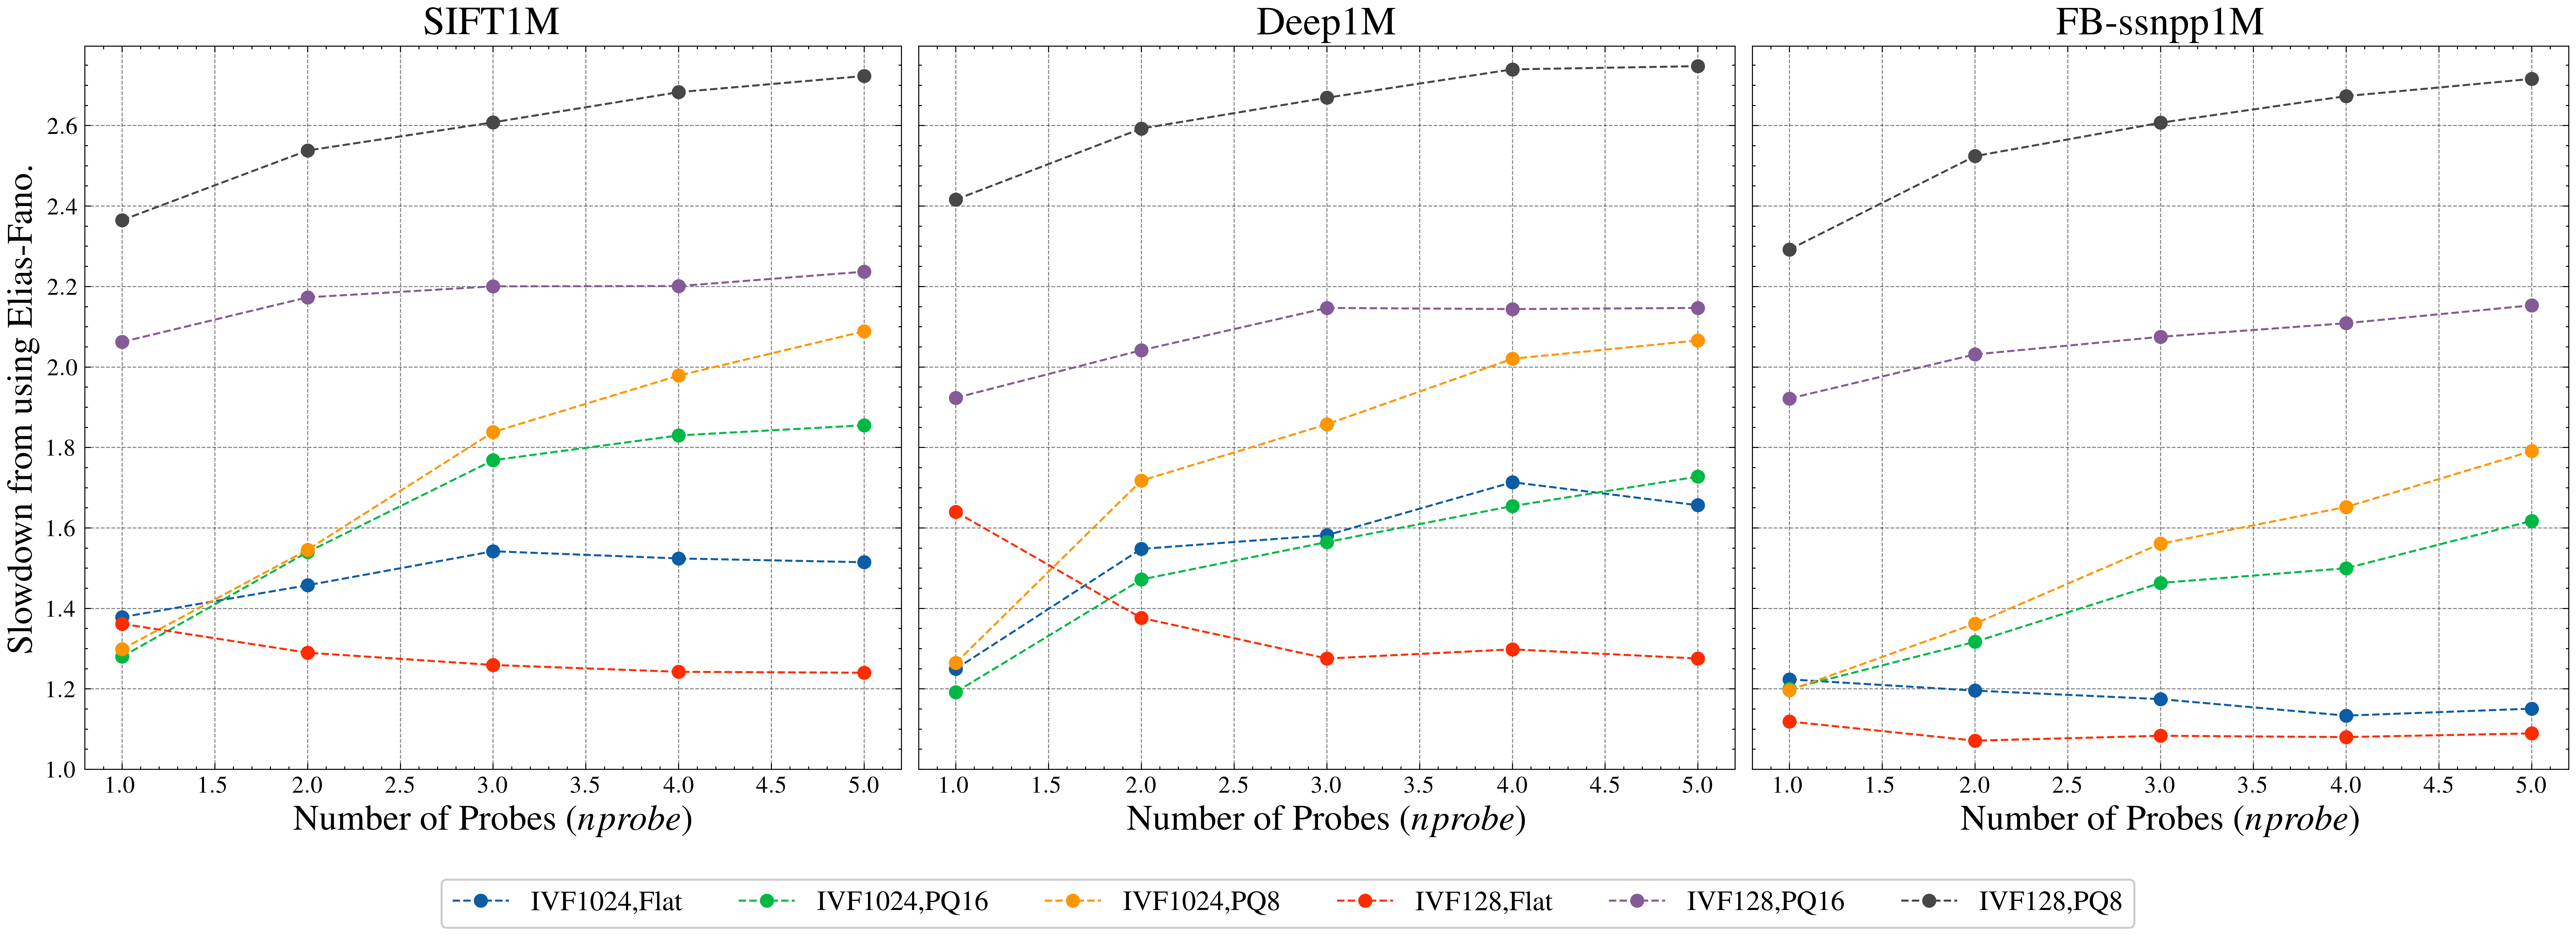

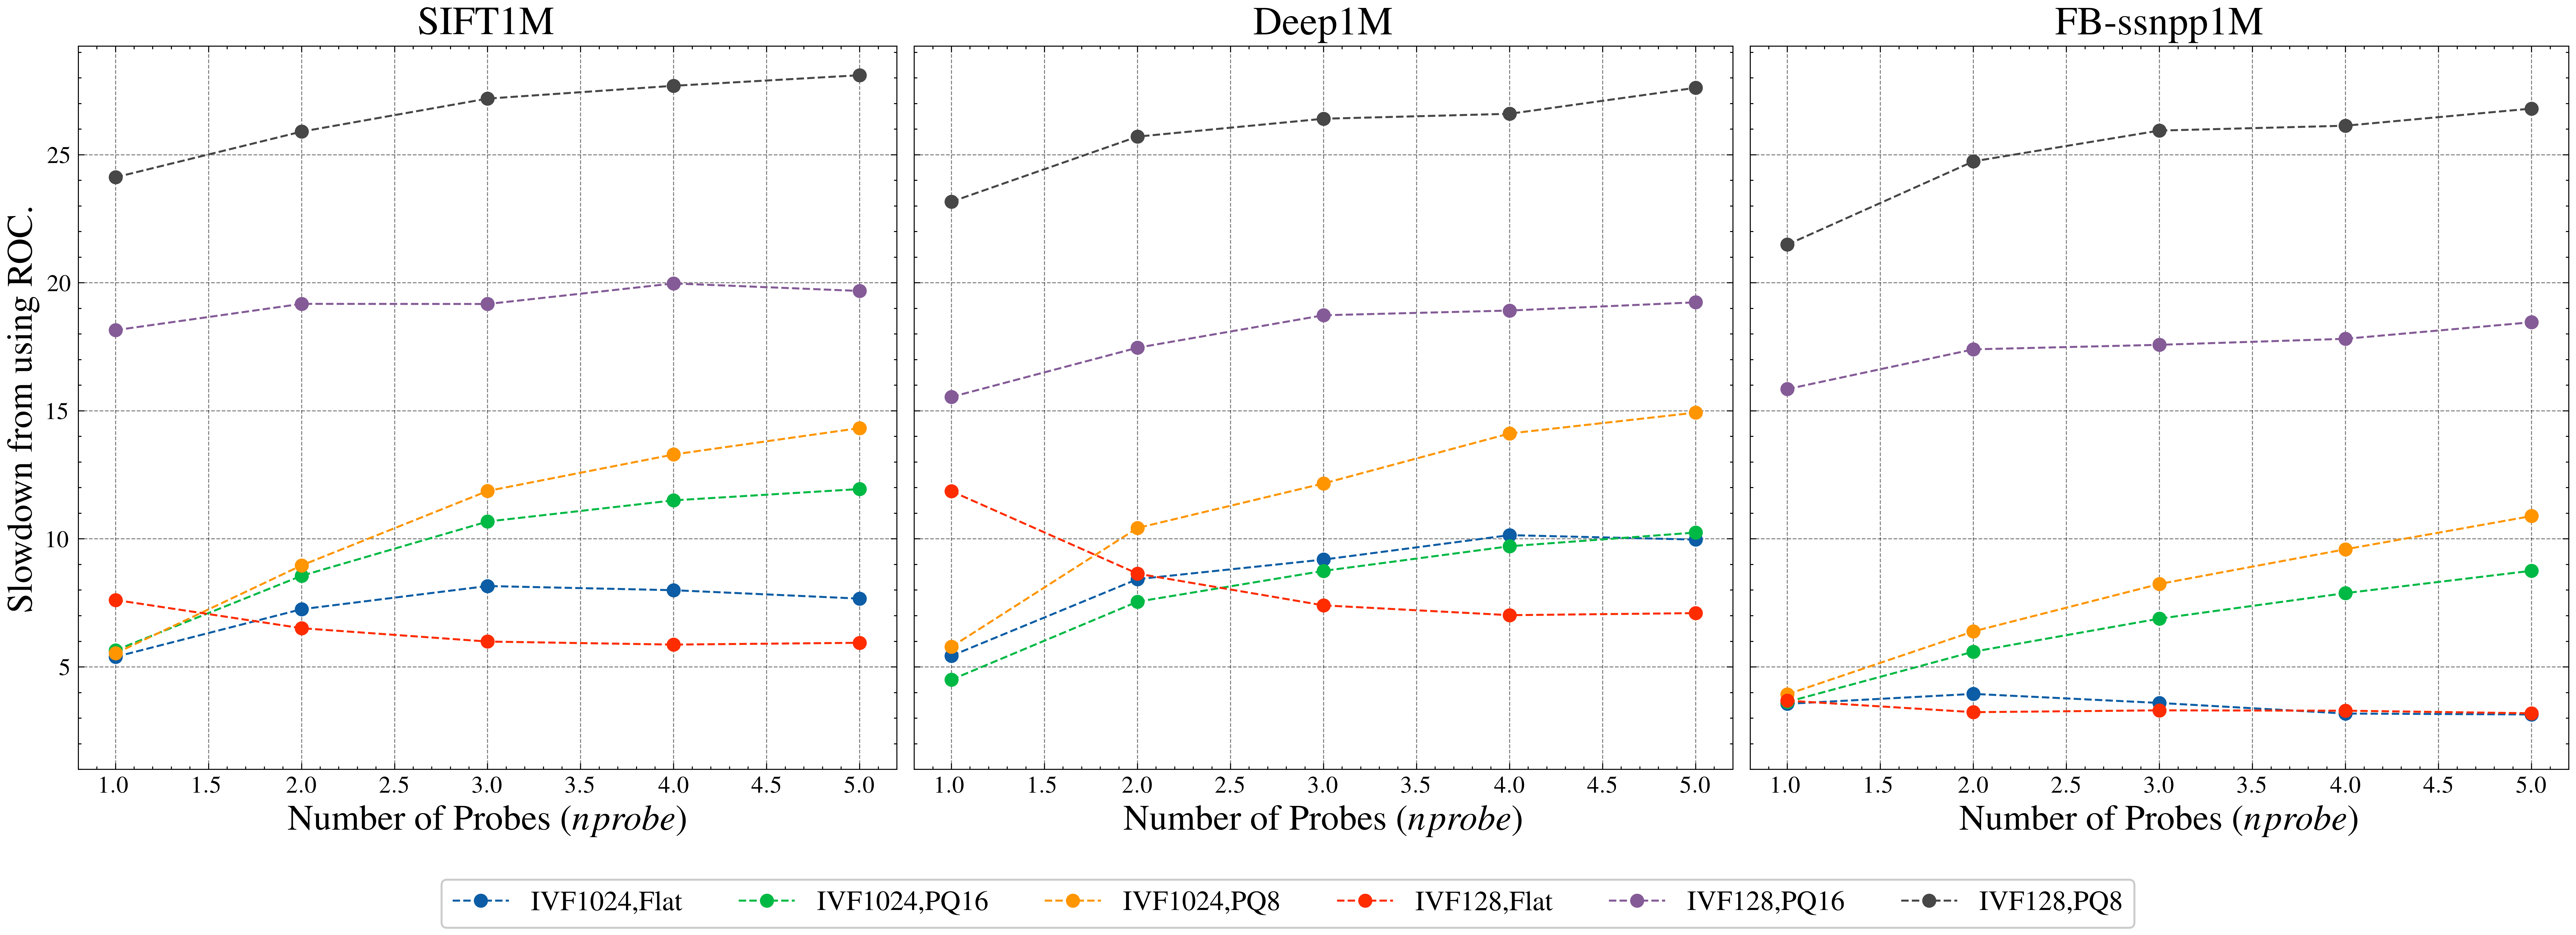

In [63]:
import matplotlib.pyplot as plt

def plot_datasets(df):
    for method in ['elias-fano', 'roc']:
        # Create a figure with 3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        # Plot for each dataset
        datasets = ['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']
        lines = []
        labels = []
        # ivfs, codes = zip(*df['index_str'].str.split(',').values)
        # ivfs, codes = list(set(ivfs)), list(set(codes))
        # colors = ['#377eb8', '#ff7f00', '#4daf4a', '#984ea3', '#a65628']  # Research-friendly colors
        # linestyles = ['-', '--', '-.']
        # color_map = {
        #     ivf: colors[i] for i, ivf in enumerate(ivfs)
        # }
        # linestyle_map = {
        #     code: linestyles[i] for i, code in enumerate(codes)
        # }
        for i, dataset in enumerate(datasets):
            dataset_df = df[df['dataset'] == dataset]
            
            for j, index_str in enumerate(dataset_df['index_str'].unique()):
                subset = dataset_df[dataset_df['index_str'] == index_str]
                ivf, code = index_str.split(',')
                # line, = axs[i].plot(subset['nprobe'], subset['elias-fano'] / subset['ref'], marker='o', color=color_map[ivf], linestyle=linestyle_map[code])
                line, = axs[i].plot(subset['nprobe'], subset[method] / subset['ref'], marker='o', linestyle='--')
                if i == 0:
                    lines.append(line)
                    labels.append(index_str)
            
            title_map = {
                'DatasetDeep1B': 'Deep1M',
                'DatasetSIFT1M': 'SIFT1M',
                'DatasetFB_ssnpp': 'FB-ssnpp1M',
            }
            axs[i].set_title(title_map[dataset], fontsize=20)
            axs[i].set_xlabel('Number of Probes ($nprobe$)', fontsize=18)
            if i == 0:
                if method == 'elias-fano':
                    axs[i].set_ylabel('Slowdown from using Elias-Fano.', fontsize=18)

                elif method == 'roc':
                    axs[i].set_ylabel('Slowdown from using ROC.', fontsize=18)
            axs[i].grid(True)
            axs[i].set_ylim(1.0)
            axs[i].tick_params(axis='both', which='major', labelsize=12)
            axs[i].tick_params(axis='both', which='minor', labelsize=10)

        
        # Single legend for all subplots
        fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=6, fontsize=14)
        plt.tight_layout()
        plt.savefig(f'fig-nprobe-walltime-{method}.pdf', bbox_inches='tight')
        plt.show()

# Plot for each dataset
display(df_median_ivf_on)
# for nq in df['nq'].unique():
#     for k in df['k'].unique():
#        print(f'{nq=}, {k=}')
df_ivf_nprobe = df_median_ivf_on#.query("nq == 5 & k == 5")
df_ivf_nprobe = df_ivf_nprobe.groupby(['nprobe', 'index_str', 'dataset']).mean()
df_ivf_nprobe = df_ivf_nprobe['dt_search'].reset_index()
df_ivf_nprobe = df_ivf_nprobe[df_ivf_nprobe['index_str'].isin([f'IVF{c},{q}' for c in [1024, 128] for q in ['PQ8', 'PQ16', 'Flat']])]

plot_datasets(df_ivf_nprobe)

## graphs

In [ ]:
df = pd.read_csv(csv_paths['graph-on'])
df['ids_size'] = df['ids_size'].astype(float)/df['num_edges']
df_median_graph_on = df.groupby(columns_groupby_for_online)[columns_metric].median().unstack("comp_method")
display(df, df_median_graph_on)

,dt_search,nprobe,run_id,index_str,k,nq,comp_method,dataset,ids_size,overhead_size,nb,nt,num_edges
0,0.003330,1,0,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
1,0.000239,1,1,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
2,0.000233,1,2,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
3,0.000196,1,3,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
4,0.000196,1,4,"NSG128,Flat",5,5,ref,DatasetSIFT1M,8.000000,NaN,1000000,100000,25204473
...,...,...,...,...,...,...,...,...,...,...,...,...,...
215995,0.000234,5,95,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112
215996,0.000234,5,96,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112
215997,0.000243,5,97,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112
215998,0.000234,5,98,"NSG16,Flat",20,20,compact,DatasetFB_ssnpp,2.491446,0.0,1000000,10000000,13556112


dt_search  \
comp_method                                                  compact   
nprobe nq k  nb      dataset         index_str   nt                    
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000  0.000955   
                                     NSG16,Flat  358480000  0.000722   
                                     NSG32,Flat  358480000  0.000990   
                                     NSG64,Flat  358480000  0.000932   
                     DatasetFB_ssnpp NSG128,Flat 10000000   0.001251   
...                                                              ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000   0.001558   
                     DatasetSIFT1M   NSG128,Flat 100000     0.000351   
                                     NSG16,Flat  100000     0.000242   
                                     NSG32,Flat  100000     0.000318   
                                     NSG64,Flat  100000     0.000339   

                                                                       \
comp_method                                                elias-fano   
nprobe nq k  nb      dataset         index_str   nt                     
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000   0.000196   
                                     NSG16,Flat  358480000   0.000173   
                                     NSG32,Flat  358480000   0.000194   
                                     NSG64,Flat  358480000   0.000200   
                     DatasetFB_ssnpp NSG128,Flat 10000000    0.000483   
...                                                               ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000    0.001686   
                     DatasetSIFT1M   NSG128,Flat 100000      0.000413   
                                     NSG16,Flat  100000      0.000258   
                                     NSG32,Flat  100000      0.000339   
                                     NSG64,Flat  100000      0.000379   

                                                                      \
comp_method                                                      ref   
nprobe nq k  nb      dataset         index_str   nt                    
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000  0.000178   
                                     NSG16,Flat  358480000  0.000155   
                                     NSG32,Flat  358480000  0.000175   
                                     NSG64,Flat  358480000  0.000176   
                     DatasetFB_ssnpp NSG128,Flat 10000000   0.000665   
...                                                              ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000   0.001520   
                     DatasetSIFT1M   NSG128,Flat 100000     0.000330   
                                     NSG16,Flat  100000     0.000234   
                                     NSG32,Flat  100000     0.000293   
                                     NSG64,Flat  100000     0.000318   

                                                                      \
comp_method                                                      roc   
nprobe nq k  nb      dataset         index_str   nt                    
1      5  5  1000000 DatasetDeep1B   NSG128,Flat 358480000  0.000429   
                                     NSG16,Flat  358480000  0.000376   
                                     NSG32,Flat  358480000  0.000377   
                                     NSG64,Flat  358480000  0.000420   
                     DatasetFB_ssnpp NSG128,Flat 10000000   0.001223   
...                                                              ...   
5      20 20 1000000 DatasetFB_ssnpp NSG64,Flat  10000000   0.002972   
                     DatasetSIFT1M   NSG128,Flat 100000     0.000940   
                                     NSG16,Flat  100000     0.000558   
                                     NSG32,Flat  100000     0.000783   
                                     NSG64,Flat  100000     0.000877   

         

In [65]:
import matplotlib.pyplot as plt

def plot_datasets(df):
    for method in ['elias-fano', 'roc']:
        # Create a figure with 3 subplots
        fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
        
        # Plot for each dataset
        datasets = ['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']
        lines = []
        labels = []
        for i, dataset in enumerate(datasets):
            dataset_df = df[df['dataset'] == dataset]
            
            for j, index_str in enumerate(dataset_df['index_str'].unique()):
                subset = dataset_df[dataset_df['index_str'] == index_str]
                ivf, code = index_str.split(',')
                # line, = axs[i].plot(subset['nprobe'], subset['elias-fano'] / subset['ref'], marker='o', color=color_map[ivf], linestyle=linestyle_map[code])
                line, = axs[i].plot(subset['k'], subset[method] / subset['ref'], marker='o', linestyle='--')
                if i == 0:
                    lines.append(line)
                    labels.append(index_str)
            
            title_map = {
                'DatasetDeep1B': 'Deep1M',
                'DatasetSIFT1M': 'SIFT1M',
                'DatasetFB_ssnpp': 'FB-ssnpp1M',
            }
            axs[i].set_title(title_map[dataset], fontsize=20)
            axs[i].set_xlabel('Number of Probes ($nprobe$)', fontsize=18)
            if i == 0:
                if method == 'elias-fano':
                    axs[i].set_ylabel('Slowdown from using Elias-Fano.', fontsize=18)

                elif method == 'roc':
                    axs[i].set_ylabel('Slowdown from using ROC.', fontsize=18)
            axs[i].grid(True)
            axs[i].set_ylim(1.0)
            axs[i].tick_params(axis='both', which='major', labelsize=12)
            axs[i].tick_params(axis='both', which='minor', labelsize=10)

        
        # Single legend for all subplots
        fig.legend(lines, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=6, fontsize=14)
        plt.tight_layout()
        plt.savefig(f'fig-nprobe-walltime-{method}.pdf', bbox_inches='tight')
        plt.show()

# Plot for each dataset
# for nq in df['nq'].unique():
#     for k in df['k'].unique():
#        print(f'{nq=}, {k=}')
df_graph_on = df_median_graph_on
df_graph_on = df_graph_on.groupby(['index_str', 'dataset']).mean()
df_graph_on = df_graph_on['dt_search'].reset_index()
display(df_graph_on)

plot_datasets(df_graph_on)

comp_method,index_str,dataset,compact,elias-fano,ref,roc
0,"NSG128,Flat",DatasetDeep1B,0.000255,0.000262,0.000225,0.000589
1,"NSG128,Flat",DatasetFB_ssnpp,0.001534,0.001198,0.001348,0.002264
2,"NSG128,Flat",DatasetSIFT1M,0.000267,0.000289,0.000236,0.000638
3,"NSG16,Flat",DatasetDeep1B,0.000203,0.000206,0.000182,0.000457
4,"NSG16,Flat",DatasetFB_ssnpp,0.000202,0.000206,0.000187,0.000380
5,"NSG16,Flat",DatasetSIFT1M,0.000191,0.000195,0.000177,0.000390
6,"NSG32,Flat",DatasetDeep1B,0.000233,0.000238,0.000203,0.000501
7,"NSG32,Flat",DatasetFB_ssnpp,0.000364,0.000376,0.000345,0.000678
8,"NSG32,Flat",DatasetSIFT1M,0.000254,0.000238,0.000223,0.000558
9,"NSG64,Flat",DatasetDeep1B,0.000240,0.000246,0.000212,0.000565


KeyError: 'k'

# Entropy of codes

In [ ]:
from faiss.contrib.datasets import DatasetSIFT1M, DatasetDeep1B
from faiss.contrib.inspect_tools import get_invlist
import faiss
import numpy as np

# ds = DatasetDeep1B(int(1e6))
ds = DatasetSIFT1M()
index_string = 'IVF1024,PQ8'

index = faiss.index_factory(ds.d, index_string)
index.train(ds.get_train())
database = ds.get_database()
index.add(database)
num_clusters = index.invlists.nlist

### entropy of X[:, i]

In [ ]:
from faiss.contrib.datasets import DatasetSIFT1M, DatasetDeep1B, SyntheticDataset
from qinco_datasets import DatasetFB_ssnpp
from faiss.contrib.inspect_tools import get_invlist
import faiss
import numpy as np

import pickle
from datetime import datetime

def batched_log_ascending_factorial(a, k):
    cummulative_log_factorial = np.cumsum(np.log2(a + np.arange(np.max(k))))
    return cummulative_log_factorial[k - 1]

def compute_bits(seq, alphabet_size=256):
    _, counts = np.unique(seq, return_counts=True)
    seq_info_content = (
        batched_log_ascending_factorial(alphabet_size, len(seq))
        - batched_log_ascending_factorial(1, counts).sum()
    )
    return seq_info_content

def compute_entropy(X):
    num_examples, num_vars = X.shape
    entropies = np.zeros(num_vars)
    for i in range(num_vars):
        x = X[:, i]

        _, x_counts = np.unique(x, return_counts=True)

        x_prob = x_counts/num_examples

        entropies[i] = -np.sum(x_prob*np.log2(x_prob))
    return entropies


timestamp = datetime.now().strftime("%Y-%m-%d_%H-%M-%S")
datasets=[
    SyntheticDataset(32, 10_000, 1000_000, 10_000)
]

results = []
for ds in datasets:
    for index_str in [f'IVF1024,PQ{2**c}' for c in [1, 2, 3, 4, 5]]:
        try:
            index = faiss.index_factory(ds.d, index_str)
            index.train(ds.get_train())
            database = ds.get_database()
            index.add(database)

            num_clusters = index.invlists.nlist
            codes_per_cluster = [get_invlist(index.invlists, c)[1] for c in range(num_clusters)]
            num_samples, num_vars = np.concatenate(codes_per_cluster).shape

            bpe_per_component = np.zeros(num_vars)
            for c, codes in enumerate(codes_per_cluster):
                for i in range(num_vars):
                    bpe_per_component[i] += compute_bits(codes[:, i])
            bpe_per_component /= num_samples
            results.append({'bpes': bpe_per_component, 'index_str': index_str})
            print(results)
        except Exception as e:
            print(index_str, e, flush=True)

WARNING clustering 10000 points to 1024 centroids: please provide at least 39936 training points


[{'bpes': array([7.78918713, 7.72029829]), 'index_str': 'IVF1024,PQ2'}]


WARNING clustering 10000 points to 1024 centroids: please provide at least 39936 training points


[{'bpes': array([7.78918713, 7.72029829]), 'index_str': 'IVF1024,PQ2'}, {'bpes': array([7.60465793, 7.570107  , 7.39952265, 7.58869843]), 'index_str': 'IVF1024,PQ4'}]


WARNING clustering 10000 points to 1024 centroids: please provide at least 39936 training points


[{'bpes': array([7.78918713, 7.72029829]), 'index_str': 'IVF1024,PQ2'}, {'bpes': array([7.60465793, 7.570107  , 7.39952265, 7.58869843]), 'index_str': 'IVF1024,PQ4'}, {'bpes': array([7.3263077 , 7.38602399, 7.36250446, 7.28049532, 7.25403981,
       7.34396146, 7.37417005, 7.34492621]), 'index_str': 'IVF1024,PQ8'}]


WARNING clustering 10000 points to 1024 centroids: please provide at least 39936 training points


[{'bpes': array([7.78918713, 7.72029829]), 'index_str': 'IVF1024,PQ2'}, {'bpes': array([7.60465793, 7.570107  , 7.39952265, 7.58869843]), 'index_str': 'IVF1024,PQ4'}, {'bpes': array([7.3263077 , 7.38602399, 7.36250446, 7.28049532, 7.25403981,
       7.34396146, 7.37417005, 7.34492621]), 'index_str': 'IVF1024,PQ8'}, {'bpes': array([7.18444217, 7.20621763, 7.19114096, 7.19313344, 7.20176491,
       7.22160745, 7.21275825, 7.22395167, 7.32590558, 7.3688091 ,
       7.399483  , 7.19251107, 7.20771307, 7.19876616, 7.20650139,
       7.17038108]), 'index_str': 'IVF1024,PQ16'}]


WARNING clustering 10000 points to 1024 centroids: please provide at least 39936 training points


[{'bpes': array([7.78918713, 7.72029829]), 'index_str': 'IVF1024,PQ2'}, {'bpes': array([7.60465793, 7.570107  , 7.39952265, 7.58869843]), 'index_str': 'IVF1024,PQ4'}, {'bpes': array([7.3263077 , 7.38602399, 7.36250446, 7.28049532, 7.25403981,
       7.34396146, 7.37417005, 7.34492621]), 'index_str': 'IVF1024,PQ8'}, {'bpes': array([7.18444217, 7.20621763, 7.19114096, 7.19313344, 7.20176491,
       7.22160745, 7.21275825, 7.22395167, 7.32590558, 7.3688091 ,
       7.399483  , 7.19251107, 7.20771307, 7.19876616, 7.20650139,
       7.17038108]), 'index_str': 'IVF1024,PQ16'}, {'bpes': array([7.23953443, 7.12768756, 7.21580185, 7.40507532, 7.24452004,
       7.2293816 , 7.26393164, 7.23975999, 7.344025  , 7.20744882,
       7.2349101 , 7.3217813 , 7.29768345, 7.1824328 , 7.14179705,
       7.84365249, 7.32058903, 7.59738977, 7.22677244, 7.74928177,
       7.69151949, 7.22416752, 7.2254306 , 7.34555295, 7.31652588,
       7.20300221, 7.26939198, 7.19598186, 7.27401651, 7.2104737 ,
       7.34

## analysis from pickle

In [ ]:
import pickle

with open("/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/results-code-compression_2024-11-12_16-13-27.pickle", 'rb') as f:
    results = pickle.load(f)
results

[{'bpes': array([7.59682813, 7.58187253]), 'index_str': 'IVF1024,PQ2'},
 {'bpes': array([7.74881363, 7.75893617, 7.74737654, 7.76021378]),
  'index_str': 'IVF1024,PQ4'},
 {'bpes': array([7.83323431, 7.82974723, 7.8344592 , 7.82495349, 7.83220705,
         7.83559578, 7.83373277, 7.83782225]),
  'index_str': 'IVF1024,PQ8'},
 {'bpes': array([7.8412256 , 7.84848019, 7.85144057, 7.84566233, 7.84184455,
         7.85382574, 7.84454679, 7.84444586, 7.84644778, 7.85451336,
         7.84287542, 7.85467575, 7.85682843, 7.85247059, 7.84921981,
         7.8462826 ]),
  'index_str': 'IVF1024,PQ16'},
 {'bpes': array([7.89369548, 7.88219216, 7.87397045, 7.87800175, 7.87974785,
         7.87743649, 7.89828359, 7.87517935, 7.86521812, 7.89342806,
         7.8896238 , 7.87172327, 7.89224605, 7.89934211, 7.88453144,
         7.88750055, 7.89158009, 7.88962496, 7.88208663, 7.89728315,
         7.88667904, 7.88143966, 7.88188164, 7.90613735, 7.87789776,
         7.90245431, 7.88206845, 7.89771844, 7.88202

In [ ]:
for r in results[:5]:
    r['dataset'] = 'DatasetDeep1B'

for r in results[5:10]:
    r['dataset'] = 'DatasetFB_ssnpp'

for r in results[10:15]:
    r['dataset'] = 'DatasetSIFT1M'

In [ ]:
import pandas as pd

clean_name_map = {
    'DatasetDeep1B': 'Deep1M',
    'DatasetFB_ssnpp': 'FB-ssnpp1M',
    'DatasetSIFT1M': 'SIFT1M',
}
df_codes = pd.DataFrame([{**r, 'dataset': clean_name_map[r['dataset']], 'bpes': r['bpes'].mean()} for r in results])

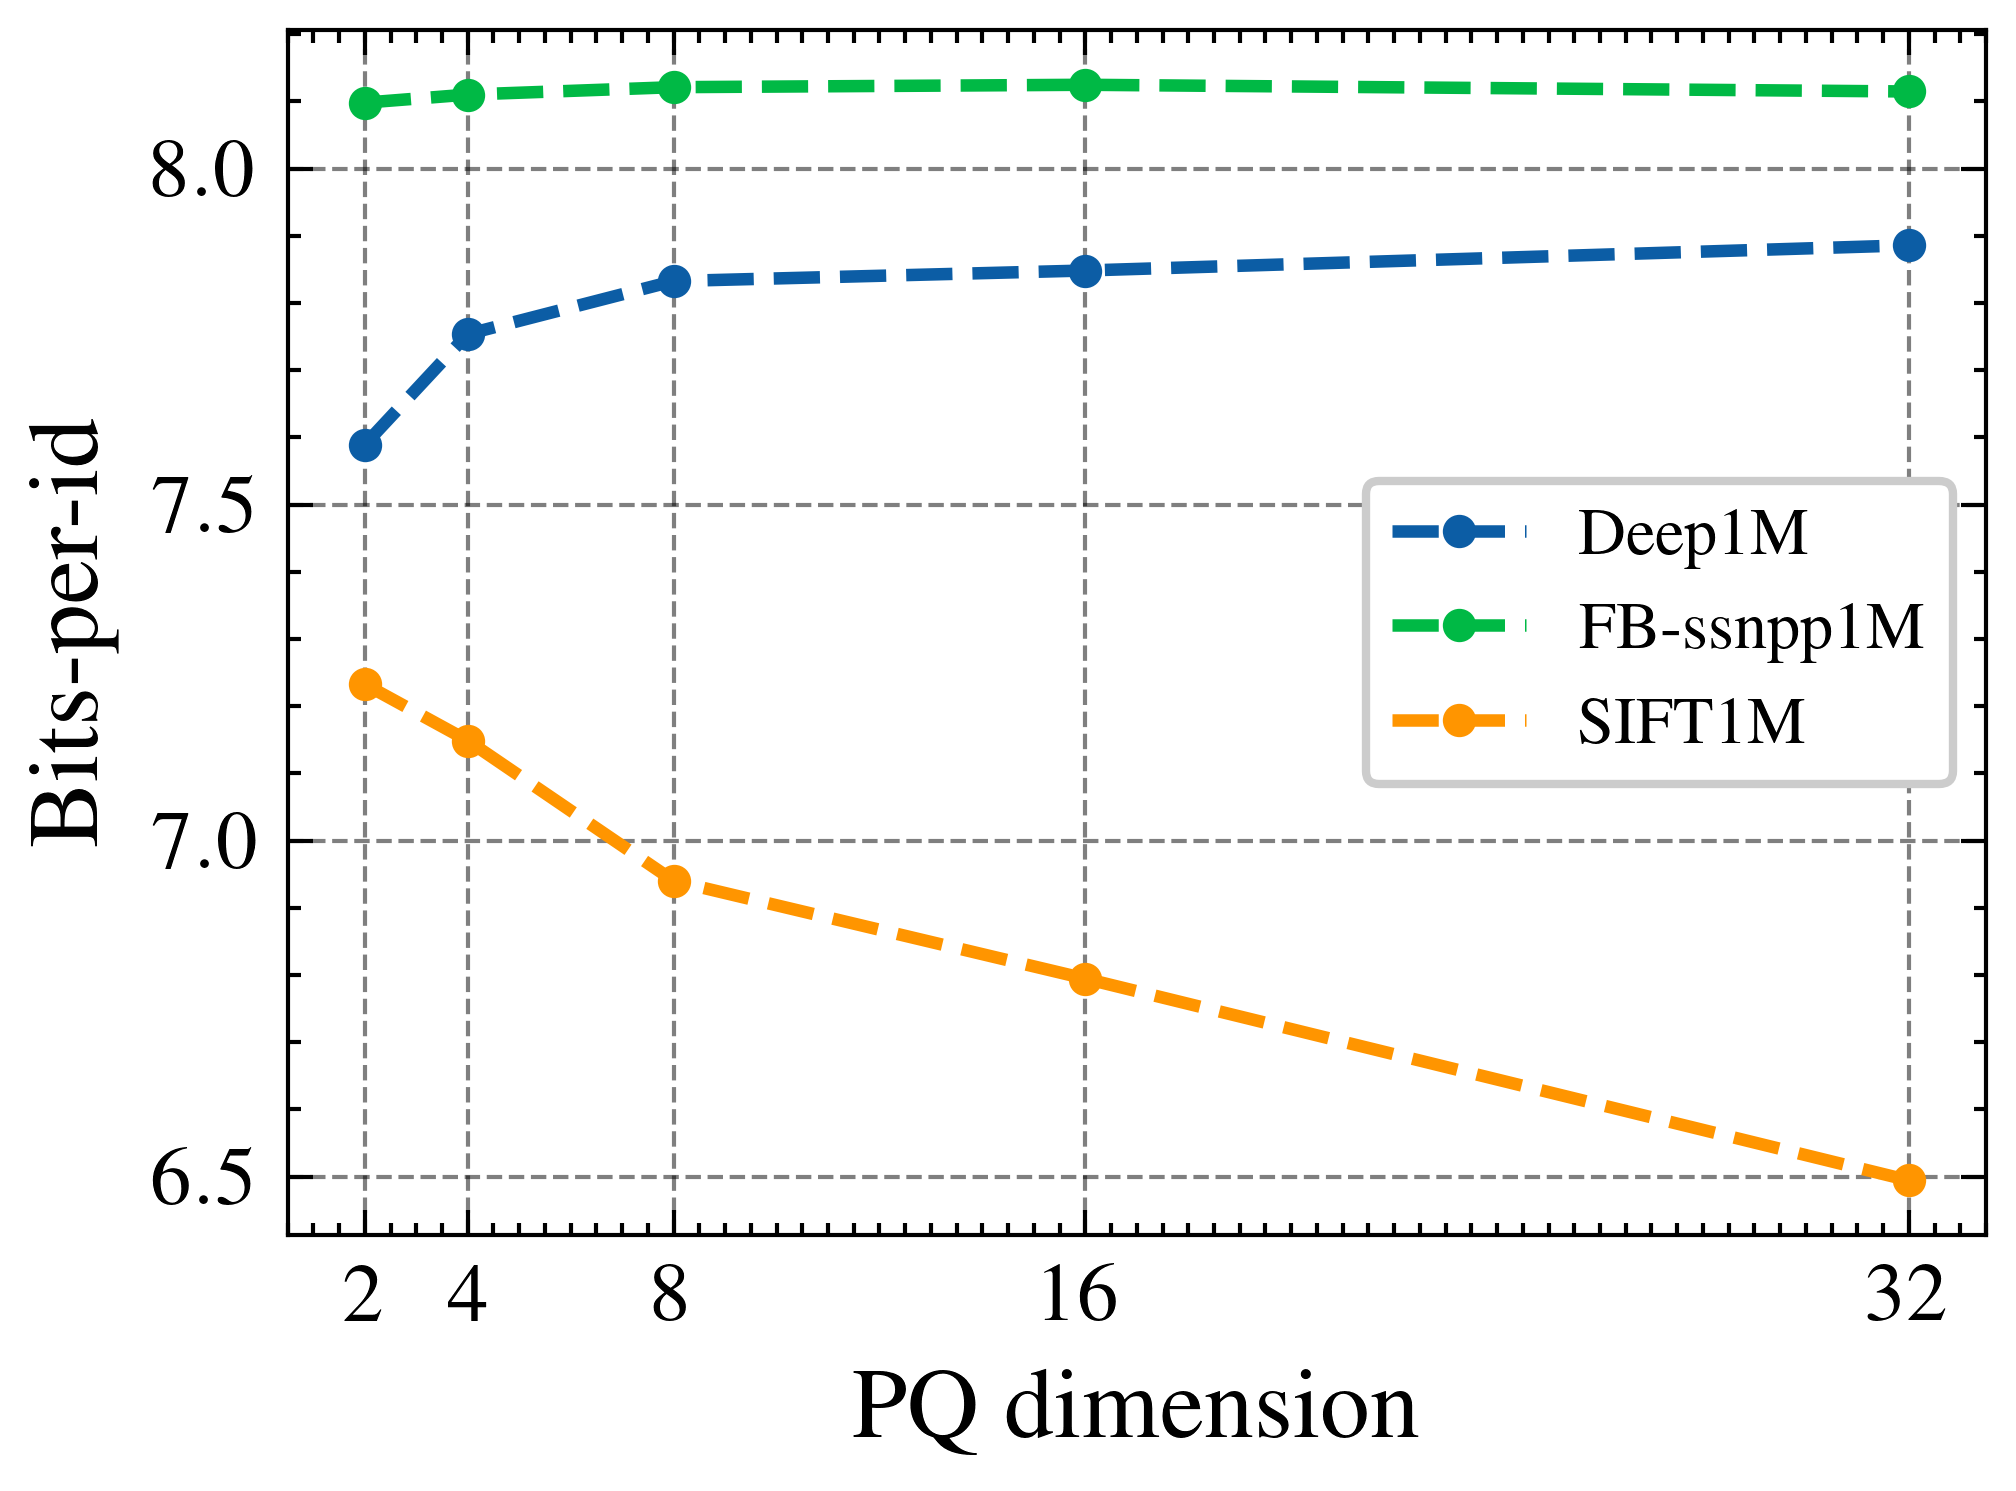

In [ ]:
import matplotlib.pyplot as plt
import scienceplots

plt.style.use(['science','grid'])

df_codes['d'] = df_codes['index_str'].str.replace('IVF1024,PQ', '').astype(int)
df = df_codes.pivot(index='d', columns='dataset', values='bpes')

x = df.index
plt.figure()
for dataset in df.columns:
    y = df[dataset]
    plt.plot(y, label=dataset, linestyle='--', marker='.', linewidth=1.5)
plt.xlabel('PQ dimension', fontsize=12)
plt.ylabel('Bits-per-id', fontsize=12)
plt.xticks(df.index, fontsize=10)  # Set xticks to exactly match df.index
plt.tick_params(axis='y', labelsize=10)
plt.legend()
plt.tight_layout()
plt.savefig(f'fig-code-compression.pdf', bbox_inches='tight')
plt.show()

### entropy of X.flatten()

In [ ]:
codes_per_cluster = [get_invlist(index.invlists, c)[1] for c in range(num_clusters)]
codes_all = np.concatenate(codes_per_cluster)

def compute_entropy(X):
    x = X.flatten()
    num_examples = x.shape

    _, x_counts = np.unique(x, return_counts=True)

    x_prob = x_counts/num_examples

    return -np.sum(x_prob*np.log2(x_prob))

codes_per_cluster = [get_invlist(index.invlists, c)[1] for c in range(num_clusters)]
codes_all = np.concatenate(codes_per_cluster)
compute_entropy(codes_all)

for c, codes in enumerate(codes_per_cluster):
    print(c, compute_entropy(codes))

0 7.88635614316979
1 7.895277489093166
2 7.787081378840279
3 7.799860956545963
4 7.889653509058418
5 7.730779625972318
6 7.837145789239125
7 7.815510052208535
8 7.874339538736508
9 7.880768279593565
10 7.886184321156706
11 7.846937608952353
12 7.53303414534857
13 7.890106406106538
14 7.790365266740139
15 7.819610121063956
16 7.732321387461848
17 7.839211114441974
18 7.907345977358043
19 7.769537558177663
20 7.883900920268603
21 7.900541998866664
22 7.886799802763935
23 7.833303973523812
24 7.91091123897511
25 7.903523937241372
26 7.785132848158297
27 7.732501783295454
28 7.886711308830263
29 7.738240783545997
30 7.919931982070482
31 7.86505143511539
32 7.820464561326282
33 7.849217089793358
34 7.892450094982479
35 7.9000530131675095
36 7.8880431892686245
37 7.919030849956343
38 7.896962630855384
39 7.832058190126326
40 7.814966973668174
41 7.91296109102094
42 7.8909019197452395
43 7.802640823639003
44 7.906951919437572
45 7.765533538279847
46 7.829501547498801
47 7.754382816395211
48 7

# PQ plot

In [144]:
# csv_path = '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 16:02:32.202230.csv'
csv_path = '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 19:33:28.635696.csv'

import pandas as pd

df_pq = pd.read_csv(csv_path)
display(df_pq)
df_pq = df_pq.groupby(['index_str', 'dataset', 'comp_method'])[['dt_search', 'ids_size']].median().reset_index()
display(df_pq)
df_pq = df_pq.pivot(index=['index_str'], values=['dt_search', 'ids_size'], columns=['dataset', 'comp_method'])
display(df_pq)

,dt_search,nprobe,run_id,index_str,k,nq,comp_method,dataset,ids_size,overhead_size,nb,nt
0,0.049546,1,0,"IVF1024,PQ2",20,10000,ref,DatasetSIFT1M,8000000,0.0,1000000,100000
1,0.047197,1,1,"IVF1024,PQ2",20,10000,ref,DatasetSIFT1M,8000000,0.0,1000000,100000
2,0.046634,1,2,"IVF1024,PQ2",20,10000,ref,DatasetSIFT1M,8000000,0.0,1000000,100000
3,0.047135,1,3,"IVF1024,PQ2",20,10000,ref,DatasetSIFT1M,8000000,0.0,1000000,100000
4,0.046864,1,4,"IVF1024,PQ2",20,10000,ref,DatasetSIFT1M,8000000,0.0,1000000,100000
...,...,...,...,...,...,...,...,...,...,...,...,...
22495,0.785782,16,95,"IVF1024,PQ32",20,10000,wavelet-tree,DatasetDeep1B,1880097,NaN,1000000,358480000
22496,0.780855,16,96,"IVF1024,PQ32",20,10000,wavelet-tree,DatasetDeep1B,1880097,NaN,1000000,358480000
22497,0.778227,16,97,"IVF1024,PQ32",20,10000,wavelet-tree,DatasetDeep1B,1880097,NaN,1000000,358480000
22498,0.790207,16,98,"IVF1024,PQ32",20,10000,wavelet-tree,DatasetDeep1B,1880097,NaN,1000000,358480000


,index_str,dataset,comp_method,dt_search,ids_size
0,"IVF1024,PQ16",DatasetDeep1B,elias-fano,0.171443,1481972.0
1,"IVF1024,PQ16",DatasetDeep1B,packed-bits,0.162224,2500262.0
2,"IVF1024,PQ16",DatasetDeep1B,ref,0.159988,8000000.0
3,"IVF1024,PQ16",DatasetDeep1B,roc,0.205819,1433312.0
4,"IVF1024,PQ16",DatasetDeep1B,wavelet-tree,0.211118,1880097.0
...,...,...,...,...,...
70,"IVF1024,PQ8",DatasetSIFT1M,elias-fano,0.117880,1479389.0
71,"IVF1024,PQ8",DatasetSIFT1M,packed-bits,0.108794,2500261.0
72,"IVF1024,PQ8",DatasetSIFT1M,ref,0.106788,8000000.0
73,"IVF1024,PQ8",DatasetSIFT1M,roc,0.149925,1430808.0


dt_search                                               \
dataset      DatasetDeep1B                                                
comp_method     elias-fano packed-bits       ref       roc wavelet-tree   
index_str                                                                 
IVF1024,PQ16      0.171443    0.162224  0.159988  0.205819     0.211118   
IVF1024,PQ2       0.083588    0.072168  0.073903  0.113196     0.118861   
IVF1024,PQ32      0.264794    0.239718  0.253278  0.288840     0.288423   
IVF1024,PQ4       0.096958    0.087475  0.086541  0.125630     0.134197   
IVF1024,PQ8       0.098544    0.086996  0.089500  0.129018     0.134842   

                                                                           \
dataset      DatasetFB_ssnpp                                                
comp_method       elias-fano packed-bits       ref       roc wavelet-tree   
index_str                                                                   
IVF1024,PQ16        0.171957    0.160620  0.161048  0.203899     0.210679   
IVF1024,PQ2         0.096512    0.085233  0.085421  0.129551     0.137725   
IVF1024,PQ32        0.242655    0.237878  0.224863  0.276025     0.298861   
IVF1024,PQ4         0.107396    0.096974  0.098381  0.140171     0.146163   
IVF1024,PQ8         0.127512    0.115219  0.116665  0.159450     0.165744   

              ...        ids_size                                    \
dataset       ... DatasetFB_ssnpp                                     
comp_method   ...      elias-fano packed-bits        ref        roc   
index_str     ...                                                     
IVF1024,PQ16  ...       1479651.0   2500269.0  8000000.0  1431032.0   
IVF1024,PQ2   ...       1479651.0   2500269.0  8000000.0  1431032.0   
IVF1024,PQ32  ...       1479651.0   2500269.0  8000000.0  1431032.0   
IVF1024,PQ4   ...       1479651.0   2500269.0  8000000.0  1431032.0   
IVF1024,PQ8   ...       1479651.0   2500269.0  8000000.0  1431032.0   

                                                                           \
dataset                   DatasetSIFT1M                                     
comp_method  wavelet-tree    elias-fano packed-bits        ref        roc   
index_str                                                                   
IVF1024,PQ16    1879920.0     1479389.0   2500261.0  8000000.0  1430808.0   
IVF1024,PQ2     1879920.0     1479389.0   2500261.0  8000000.0  1430808.0   
IVF1024,PQ32    1879920.0     1479389.0   2500261.0  8000000.0  1430808.0   
IVF1024,PQ4     1879920.0     1479389.0   2500261.0  8000000.0  1430808.0   
IVF1024,PQ8     1879920.0     1479389.0   2500261.0  8000000.0  1430808.0   

                           
dataset                    
comp_method  wavelet-tree  
index_str                  
IVF1024,PQ16    1879824.0  
IVF1024,PQ2     1879824.0  
IVF1024,PQ32    1879824.0  
IVF1024,PQ4     1879824.0  
IVF1024,PQ8     1879824.0  

[5 rows x 30 columns]

dataset     DatasetDeep1B                                          \
comp_method    elias-fano packed-bits  ref       roc wavelet-tree   
d                                                                   
2                1.131049    0.976525  1.0  1.531683     1.608335   
4                1.120363    1.010784  1.0  1.451672     1.550673   
8                1.101050    0.972024  1.0  1.441549     1.506616   
16               1.071599    1.013975  1.0  1.286462     1.319582   
32               1.045468    0.946459  1.0  1.140406     1.138759   

dataset     DatasetFB_ssnpp                                          \
comp_method      elias-fano packed-bits  ref       roc wavelet-tree   
d                                                                     
2                  1.129835    0.997802  1.0  1.516622     1.612310   
4                  1.091624    0.985699  1.0  1.424776     1.485675   
8                  1.092972    0.987611  1.0  1.366738     1.420687   
16                 1.067738    0.997346  1.0  1.266078     1.308174   
32                 1.079120    1.057877  1.0  1.227521     1.329076   

dataset     DatasetSIFT1M                                          
comp_method    elias-fano packed-bits  ref       roc wavelet-tree  
d                                                                  
2                1.143988    0.988073  1.0  1.525136     1.597545  
4                1.123736    1.002207  1.0  1.475424     1.525752  
8                1.103866    1.018779  1.0  1.403947     1.454102  
16               1.083220    1.001279  1.0  1.345784     1.377212  
32               1.057052    1.002424  1.0  1.224166     1.244344

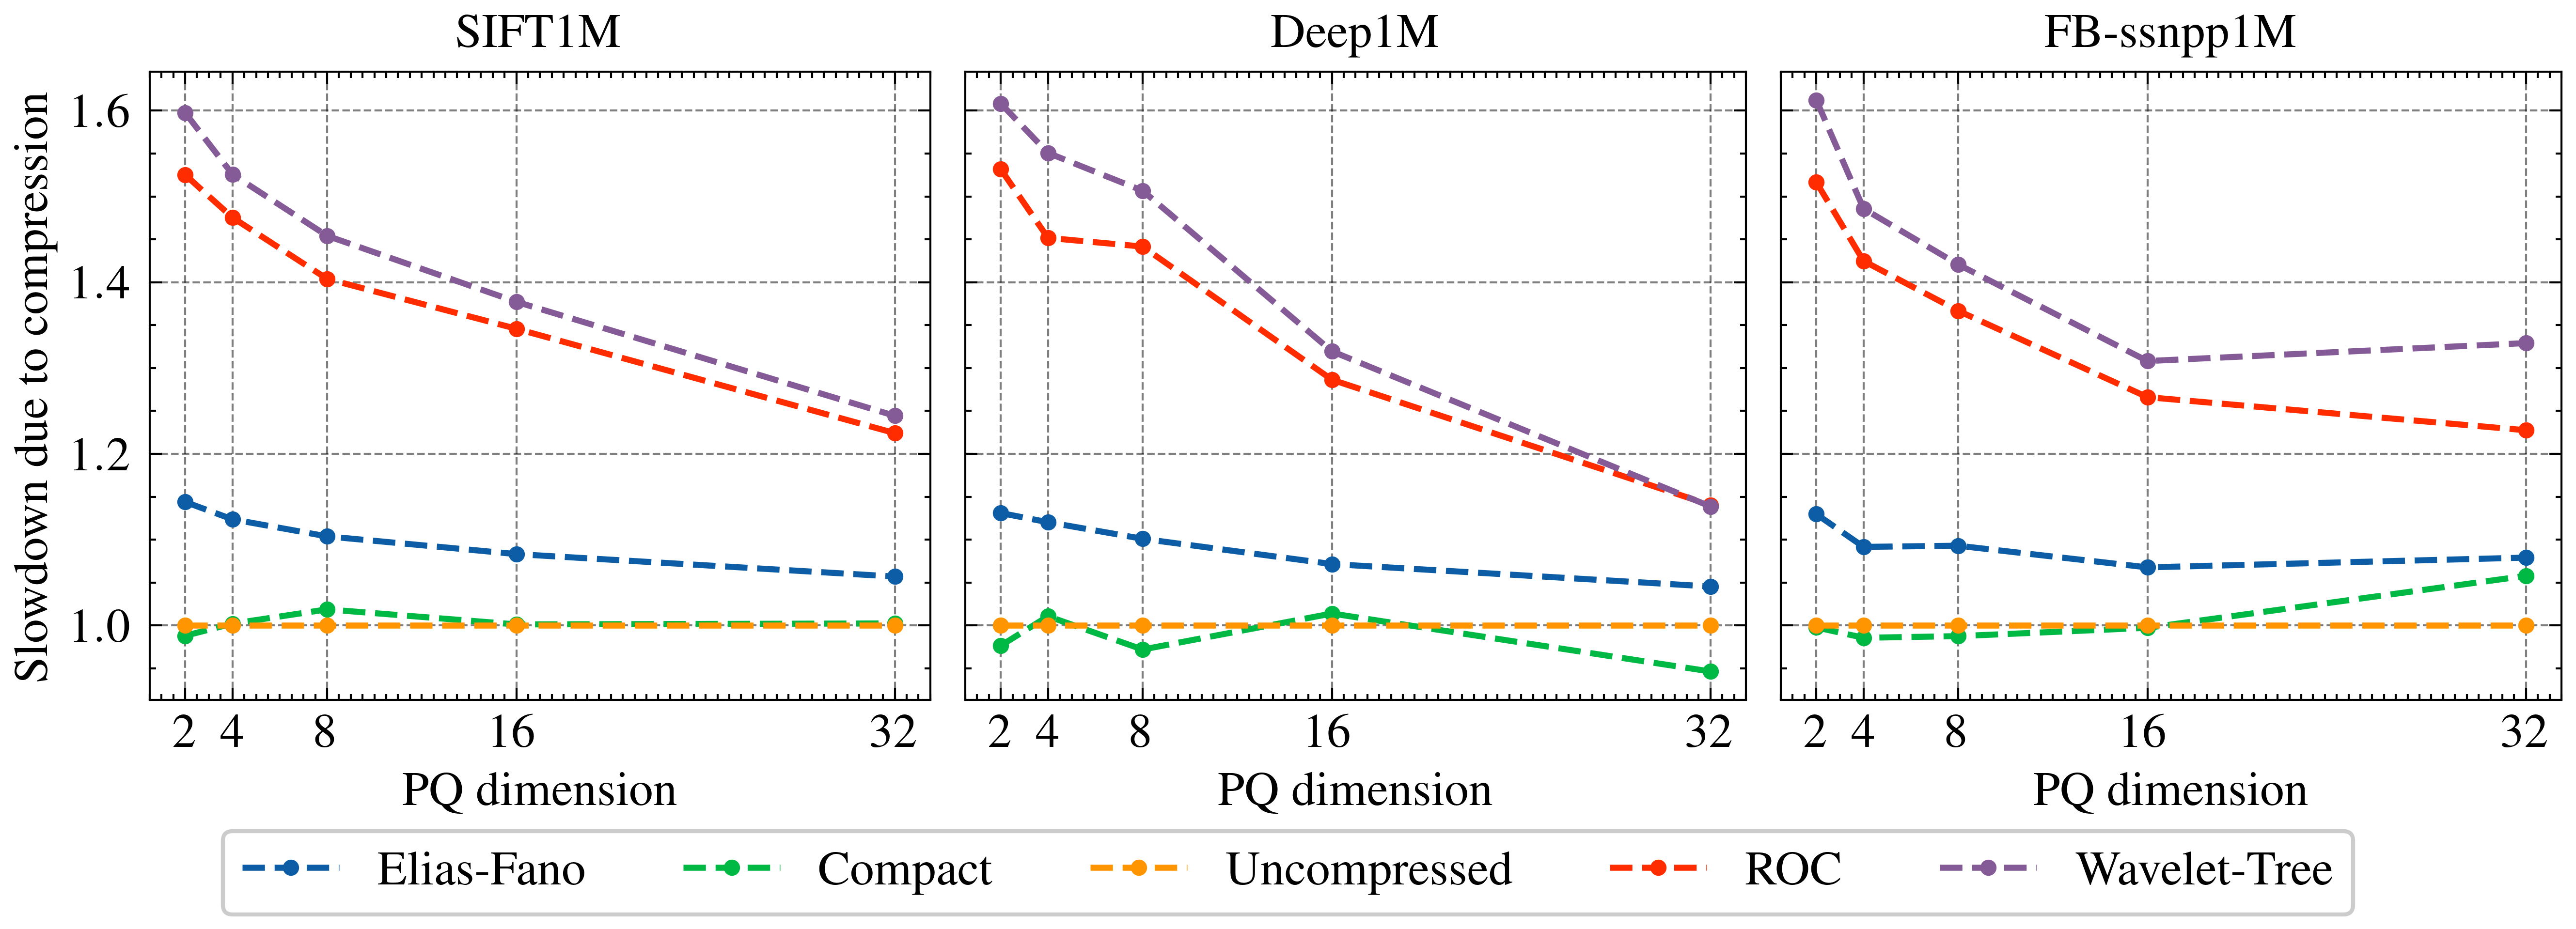

In [145]:
dt_search_norm = df_pq['dt_search']/df_pq['dt_search'].swaplevel(0, 1, axis=1)['ref']
dt_search_norm['d'] = dt_search_norm.index.str.replace('IVF1024,PQ', '').astype(int)
dt_search_norm = dt_search_norm.set_index('d', drop=True).sort_index()

display(dt_search_norm)

method_map = {
    'elias-fano': 'Elias-Fano',
    'packed-bits': 'Compact',
    'ref': 'Uncompressed',
    'roc': 'ROC',
    'wavelet-tree': 'Wavelet-Tree'
}

lines = []
labels = []
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
for i, dataset in enumerate(['DatasetSIFT1M', 'DatasetDeep1B', 'DatasetFB_ssnpp']):
    df = dt_search_norm[dataset]
    x = df.index
    for method in df.columns:
        y = df[method]
        axs[i].plot(x, y, label=method_map[method] if i == 0 else None, linestyle='--', marker='.', linewidth=1.5)

    title_map = {
        'DatasetDeep1B': 'Deep1M',
        'DatasetSIFT1M': 'SIFT1M',
        'DatasetFB_ssnpp': 'FB-ssnpp1M',
    }
    axs[i].set_title(title_map[dataset], fontsize=12)
    axs[i].set_xlabel('PQ dimension', fontsize=12)
    if i == 0:
        axs[i].set_ylabel('Slowdown due to compression', fontsize=12)
    axs[i].grid(True)
    axs[i].tick_params(axis='both', which='major', labelsize=12)
    axs[i].tick_params(axis='both', which='minor', labelsize=12)
    axs[i].set_xticks(x)

# Single legend for all subplots
fig.legend(loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=5, fontsize=12)
plt.tight_layout()
plt.savefig(f'fig-pq-walltime.pdf', bbox_inches='tight')
plt.show()

In [22]:
csv_paths = !ls /private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/
for p in csv_paths[-16:]:
    print("\'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/" + p + "\',")

csv_paths = !ls /private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/
for p in csv_paths[-24:]:
    print("\'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/" + p + "\',")

'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-07 14:04:18.891565.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.176202.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.208628.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.244880.csv',
'/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.301192.csv',
'/private/home/

In [42]:
import pandas as pd

csv_paths = [
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.176202.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.208628.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.244880.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:42.301192.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:48.067248.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:48.074286.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:48.098752.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:54.191062.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:54.191098.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:23:54.191166.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:24:00.758599.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:24:00.960828.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:24:06.252366.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:24:06.741336.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/alt-graph-index/benchmark-results-graphs-dynamic/graph-dynamic-results-2024-11-13 00:24:08.771946.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:03:50.143276-256-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:03:50.143279-256-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:03:50.288481-256-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:03:56.395578-512-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:03:56.690624-512-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:04:02.597347-1024-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:04:02.647009-512-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:04:10.881107-1024-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:04:11.431909-1024-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:04:15.930825-2048-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-12 23:04:16.308249-2048-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:51.430061-0-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:51.569941-0-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.095752-1-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.529428-3-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.594676-0-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.624906-1-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.692675-2-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.780805-3-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.827914-1-1.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.927333-2-0.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:52.927460-3-2.csv',
    '/private/home/dsevero/repos/NeuralCompressionInternal/projects/intern_faiss_ivf_compression/custom_invlist_cpp/benchmark-results/ivf-results-2024-11-13 00:55:53.170831-2-2.csv',

] 


df = pd.concat([pd.read_csv(path) for path in csv_paths], ignore_index=True)
df = df.query("nprobe == 16")
print(df.index_str.unique())

display(df[['dataset', 'num_edges']].drop_duplicates())

display(df)
df.loc[df.comp_method == 'compact', 'comp_method'] = 'packed-bits'
df['normalizer'] = 1_000_000
df.loc[df.index_str.str.startswith('NSG'), 'normalizer'] = df.loc[df.index_str.str.startswith('NSG'), 'num_edges']
df['ids_size'] = 8*df['ids_size']/df['normalizer']

index_order = [
    'IVF256,Flat',
    'IVF512,Flat',
    'IVF1024,Flat',
    'IVF2048,Flat',
    'NSG16,Flat',
    'NSG32,Flat',
    'NSG64,Flat',
    'NSG128,Flat',
    'NSG256,Flat',
    'IVF1024,PQ16',
    'IVF1024,PQ32',
    'IVF1024,PQ4np',
    'IVF1024,PQ8x10np'
]

dataset_order = [
    'DatasetSIFT1M',
    'DatasetDeep1B',
    'DatasetFB_ssnpp'
]

method_map = {
    'elias-fano': 'Elias-Fano',
    'packed-bits': 'Compact',
    'ref': 'Uncompressed',
    'roc': 'ROC',
    'wavelet-tree': 'Wavelet-Tree'
}

methods_order = [
    'Uncompressed',
    'Compact',
    'Elias-Fano',
    'Wavelet-Tree',
    'ROC'
]

df['comp_method'] = df['comp_method'].replace(method_map)
df = df.groupby(['index_str', 'dataset', 'comp_method'])[['dt_search', 'ids_size']].median().reset_index()
df = df.pivot(index=['index_str'], values=['dt_search', 'ids_size'], columns=['dataset', 'comp_method'])
df = df.loc[index_order]
df = df.swaplevel(0, 2, axis=1)[methods_order].swaplevel(2, 0, axis=1)
display(df)

display(df['ids_size'][dataset_order])
print(df['ids_size'][dataset_order].to_latex(float_format="$%.1f$", na_rep='-').replace(",Flat", ""))
print(df['dt_search'][dataset_order].to_latex(na_rep='', float_format=lambda x: "${:#.2g}$".format(x).replace("$0.", "$.")).replace(",Flat", ""))

['NSG16,Flat' 'NSG32,Flat' 'NSG64,Flat' 'NSG128,Flat' 'NSG256,Flat'
 'IVF256,Flat' 'IVF512,Flat' 'IVF1024,Flat' 'IVF2048,Flat' 'IVF1024,PQ16'
 'IVF1024,PQ32' 'IVF1024,PQ8x10np' 'IVF1024,PQ4np']


,dataset,num_edges
200,DatasetFB_ssnpp,13568898.0
1400,DatasetSIFT1M,14392912.0
2600,DatasetDeep1B,14615471.0
3800,DatasetFB_ssnpp,19420162.0
5000,DatasetSIFT1M,22465751.0
6200,DatasetDeep1B,21405933.0
7400,DatasetSIFT1M,20056477.0
8600,DatasetDeep1B,24430732.0
9800,DatasetFB_ssnpp,35329964.0
11000,DatasetFB_ssnpp,25811841.0


,dt_search,nprobe,run_id,index_str,k,nq,comp_method,dataset,ids_size,overhead_size,nb,nt,num_edges
200,0.096205,16,0,"NSG16,Flat",20,10000,ref,DatasetFB_ssnpp,108551184.0,NaN,1000000,10000000,13568898.0
201,0.097968,16,1,"NSG16,Flat",20,10000,ref,DatasetFB_ssnpp,108551184.0,NaN,1000000,10000000,13568898.0
202,0.091821,16,2,"NSG16,Flat",20,10000,ref,DatasetFB_ssnpp,108551184.0,NaN,1000000,10000000,13568898.0
203,0.091352,16,3,"NSG16,Flat",20,10000,ref,DatasetFB_ssnpp,108551184.0,NaN,1000000,10000000,13568898.0
204,0.092571,16,4,"NSG16,Flat",20,10000,ref,DatasetFB_ssnpp,108551184.0,NaN,1000000,10000000,13568898.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
52495,0.329968,16,95,"IVF1024,PQ4np",20,10000,wavelet-tree,DatasetDeep1B,1880097.0,NaN,1000000,358480000,NaN
52496,0.329395,16,96,"IVF1024,PQ4np",20,10000,wavelet-tree,DatasetDeep1B,1880097.0,NaN,1000000,358480000,NaN
52497,0.333017,16,97,"IVF1024,PQ4np",20,10000,wavelet-tree,DatasetDeep1B,1880097.0,NaN,1000000,358480000,NaN
52498,0.330431,16,98,"IVF1024,PQ4np",20,10000,wavelet-tree,DatasetDeep1B,1880097.0,NaN,1000000,358480000,NaN


dt_search                                    ids_size  \
dataset          DatasetDeep1B DatasetFB_ssnpp DatasetSIFT1M DatasetDeep1B   
comp_method       Uncompressed    Uncompressed  Uncompressed  Uncompressed   
index_str                                                                    
IVF256,Flat           5.582175       21.075128      6.469149          64.0   
IVF512,Flat           2.885489        6.269481      3.665839          64.0   
IVF1024,Flat          1.215855        3.208902      2.138064          64.0   
IVF2048,Flat          0.706941             NaN      0.998546          64.0   
NSG16,Flat            0.191898        0.094218      0.115350          64.0   
NSG32,Flat            0.272926        0.347529      0.258803          64.0   
NSG64,Flat            0.289859        0.535604      0.289009          64.0   
NSG128,Flat           0.374565        1.099506      0.203576          64.0   
NSG256,Flat           0.220788        2.770635      0.270321          64.0   
IVF1024,PQ16          0.471368        0.474617      0.465749          64.0   
IVF1024,PQ32          0.911131        0.881283      0.772316          64.0   
IVF1024,PQ4np         0.294062        0.244075      0.307134          64.0   
IVF1024,PQ8x10np      1.929893        1.975499      1.933143          64.0   

                                                   dt_search                  \
dataset          DatasetFB_ssnpp DatasetSIFT1M DatasetDeep1B DatasetFB_ssnpp   
comp_method         Uncompressed  Uncompressed       Compact         Compact   
index_str                                                                      
IVF256,Flat                 64.0          64.0      5.403310       20.824646   
IVF512,Flat                 64.0          64.0      2.110917        5.836705   
IVF1024,Flat                64.0          64.0      1.213556        3.146350   
IVF2048,Flat                 NaN          64.0      0.694450             NaN   
NSG16,Flat                  64.0          64.0      0.198441        0.092942   
NSG32,Flat                  64.0          64.0      0.268915        0.204216   
NSG64,Flat                  64.0          64.0      0.196458        0.739431   
NSG128,Flat                 64.0          64.0      0.251368        1.119891   
NSG256,Flat                 64.0          64.0      0.235411        2.788447   
IVF1024,PQ16                64.0          64.0      0.467860        0.490806   
IVF1024,PQ32                64.0          64.0      0.918598        0.882418   
IVF1024,PQ4np               64.0          64.0      0.280718        0.245842   
IVF1024,PQ8x10np            64.0          64.0      1.929897        1.974590   

                                    ids_size  ...     dt_search      ids_size  \
dataset          DatasetSIFT1M DatasetDeep1B  ... DatasetSIFT1M DatasetDeep1B   
comp_method            Compact       Compact  ...  Wavelet-Tree  Wavelet-Tree   
index_str                                     ...                               
IVF256,Flat           6.383958     20.000520  ...      6.427257     12.060680   
IVF512,Flat           3.722816     20.001056  ...      3.783915     13.554976   
IVF1024,Flat          2.372592     20.002096  ...      2.483816     15.040776   
IVF2048,Flat          1.018325     20.004112  ...      1.088042     16.525672   
NSG16,Flat            0.118894     19.931569  ...           NaN           NaN   
NSG32,Flat            0.212038     19.931569  ...           NaN           NaN   
NSG64,Flat            0.218313     19.931569  ...           NaN           NaN   
NSG128,Flat           0.209850     19.931569  ...           NaN           NaN   
NSG256,Flat           0.280483     19.931569  ...           NaN           NaN   
IVF1024,PQ16          0.463697     20.002096  ...      0.520915     15.040776   
IVF1024,PQ32          0.778213     20.002096  ...      0.838806     15.040776   
IVF1024,PQ4np         0.307373     20.002096  ...      0.363394     15.040776   
IVF1024,PQ8x10np      1.986692     20

dataset          DatasetSIFT1M                                                \
comp_method       Uncompressed    Compact Elias-Fano Wavelet-Tree        ROC   
index_str                                                                      
IVF256,Flat               64.0  20.000488   9.849216    12.059776   9.426880   
IVF512,Flat               64.0  20.001128  10.867712    13.555176  10.456416   
IVF1024,Flat              64.0  20.002088  11.835112    15.038592  11.446464   
IVF2048,Flat              64.0  20.004376  12.780432    16.524584  12.435616   
NSG16,Flat                64.0  19.931569  17.990038          NaN  20.621103   
NSG32,Flat                64.0  19.931569  17.441859          NaN  19.414149   
NSG64,Flat                64.0  19.931569  17.251385          NaN  18.929593   
NSG128,Flat               64.0  19.931569  17.087763          NaN  18.516906   
NSG256,Flat               64.0  19.931569  16.886162          NaN  18.045785   
IVF1024,PQ16              64.0  20.002088  11.835112    15.038592  11.446464   
IVF1024,PQ32              64.0  20.002088  11.835112    15.038592  11.446464   
IVF1024,PQ4np             64.0  20.002088  11.835112    15.038592  11.446464   
IVF1024,PQ8x10np          64.0  20.002088  11.835112    15.038592  11.446464   

dataset          DatasetDeep1B                                                \
comp_method       Uncompressed    Compact Elias-Fano Wavelet-Tree        ROC   
index_str                                                                      
IVF256,Flat               64.0  20.000520   9.861408    12.060680   9.438528   
IVF512,Flat               64.0  20.001056  10.874312    13.554976  10.461536   
IVF1024,Flat              64.0  20.002096  11.855776    15.040776  11.466496   
IVF2048,Flat              64.0  20.004112  12.852536    16.525672  12.507456   
NSG16,Flat                64.0  19.931569  17.991781          NaN  20.514805   
NSG32,Flat                64.0  19.931569  17.369291          NaN  19.159744   
NSG64,Flat                64.0  19.931569  17.145660          NaN  18.618826   
NSG128,Flat               64.0  19.931569  16.977573          NaN  18.224840   
NSG256,Flat               64.0  19.931569  16.747649          NaN  17.721262   
IVF1024,PQ16              64.0  20.002096  11.855776    15.040776  11.466496   
IVF1024,PQ32              64.0  20.002096  11.855776    15.040776  11.466496   
IVF1024,PQ4np             64.0  20.002096  11.855776    15.040776  11.466496   
IVF1024,PQ8x10np          64.0  20.002096  11.855776    15.040776  11.466496   

dataset          DatasetFB_ssnpp                                                
comp_method         Uncompressed    Compact Elias-Fano Wavelet-Tree        ROC  
index_str                                                                       
IVF256,Flat                 64.0  20.000608   9.874936    12.060808   9.456192  
IVF512,Flat                 64.0  20.001080  10.859680    13.556136  10.450688  
IVF1024,Flat                64.0  20.002152  11.837208    15.039360  11.448256  
IVF2048,Flat                 NaN        NaN        NaN          NaN        NaN  
NSG16,Flat                  64.0  19.931569  18.084107          NaN  20.888016  
NSG32,Flat                  64.0  19.931569  17.470153          NaN  19.503219  
NSG64,Flat                  64.0  19.931569  16.941787          NaN  18.288016  
NSG128,Flat                 64.0  19.931569  16.354284          NaN  17.215808  
NSG256,Flat                 64.0  19.931569  15.706150          NaN  16.170145  
IVF1024,PQ16                64.0  20.002152  11.837208    15.039360  11.448256  
IVF1024,PQ32                64.0  20.002152  11.837208    15.039360  11.448256  
IVF1024,PQ4np               64.0  20.002152  11.837208    15.039360  11.448256  
IVF1024,PQ8x10np            64.0  20.002152  11.837208    15.039360  11.448256

\begin{tabular}{lrrrrrrrrrrrrrrr}
\toprule
dataset & \multicolumn{5}{r}{DatasetSIFT1M} & \multicolumn{5}{r}{DatasetDeep1B} & \multicolumn{5}{r}{DatasetFB_ssnpp} \\
comp_method & Uncompressed & Compact & Elias-Fano & Wavelet-Tree & ROC & Uncompressed & Compact & Elias-Fano & Wavelet-Tree & ROC & Uncompressed & Compact & Elias-Fano & Wavelet-Tree & ROC \\
index_str &  &  &  &  &  &  &  &  &  &  &  &  &  &  &  \\
\midrule
IVF256 & $64.0$ & $20.0$ & $9.8$ & $12.1$ & $9.4$ & $64.0$ & $20.0$ & $9.9$ & $12.1$ & $9.4$ & $64.0$ & $20.0$ & $9.9$ & $12.1$ & $9.5$ \\
IVF512 & $64.0$ & $20.0$ & $10.9$ & $13.6$ & $10.5$ & $64.0$ & $20.0$ & $10.9$ & $13.6$ & $10.5$ & $64.0$ & $20.0$ & $10.9$ & $13.6$ & $10.5$ \\
IVF1024 & $64.0$ & $20.0$ & $11.8$ & $15.0$ & $11.4$ & $64.0$ & $20.0$ & $11.9$ & $15.0$ & $11.5$ & $64.0$ & $20.0$ & $11.8$ & $15.0$ & $11.4$ \\
IVF2048 & $64.0$ & $20.0$ & $12.8$ & $16.5$ & $12.4$ & $64.0$ & $20.0$ & $12.9$ & $16.5$ & $12.5$ & - & - & - & - & - \\
NSG16 & $64.0$ & $19.9$ & 